<a href="https://colab.research.google.com/github/K-space-Kishan/Capstone--World-Bank-Education-EDA/blob/main/WORLD_BANK_GLOBAL_EDUCATION_ANALYSIS(Exploratory_Data_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - WORLD BANK GLOBAL EDUCATION ANALYSIS




##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA & PIRLS), equity data from household surveys, and projection/attainment data.
In 4000 indicators, there are some indicators which will be useful for us to do required analysis. Using those indicators we extract the data in different aspects for each country. There are many things that showcase the developemnt of a country, and education is one of the main factor which influence development. Thus in this project using the extrated data we will visualize data and understand how counries have performed over the years in different aspects of education sector. This way we can contemplate what are the steps did countries with great education systems have taken, how they tackled hardships and focused in which sector. Understanding this will help us to identify the sector where our country lacks and how to overcome the problem and develope our education system.
In this exploratory data analysis (EDA), we will analyze various facets of the World Bank Global Education dataset and visually represent them to gain deeper insights. Our visualizations will be categorized into two main sections:

1. Comparative analysis based on Income Groups with a focus on World Bank and government investments.
2. Country-specific comparisons across different aspects, with particular emphasis on the United States of America (a developed country) and Finland (a country renowned for having the best education system globally).

This gives us the bigger perspective of their performance and country wise gives us individual perspective. This segmentation allows for a nuanced examination, offering both a macroscopic view of performance across income groups and a microscopic assessment of individual countries.
This approach aims to facilitate comprehensive observations and draw meaningful conclusions.
In essence, this project serves as a comprehensive exploration of the educational landscape, offering a roadmap for informed decision-making and strategic planning to elevate our nation's education system.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Analyzing various facets of the World Bank Global Education dataset and visually represent them to gain deeper insights for understanding the context and list out the assumptions, testing them and answer few questions (not limited to these) such as:

*   Is there any disparity  in literacy rate over gender.
*   How countries grouped by their Income have varied expenditure in education sector.
*   Which country spends largest percentage of GDP on education
*   How does Pupil to Teacher ratio showcase the quality of education
*   Is GDP per Capita correlated to Literacy Rate

# **Let's Begin !**

### Import Libraries

In [1]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import random

### Dataset Loading

In [2]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path = "/content/drive/MyDrive/Alma Better/Capstone Projects/World Bank EDA Data"

# Using path we load the whole file at once and then load data files as required

df_Stats_Country_Series = pd.read_csv(path + "/EdStatsCountry-Series.csv")
df_Stats_Country = pd.read_csv(path + "/EdStatsCountry.csv")
df_Stats_Data = pd.read_csv(path + "/EdStatsData.csv")
df_Stats_Footnote = pd.read_csv(path + "/EdStatsFootNote.csv")
df_Stats_Series = pd.read_csv(path + "/EdStatsSeries.csv")

## **Viewing Dataset**

Let's analyze each data file to extract insights and subsequently modify them to meet our requirements.

##**Analysing the Stats Country Series file.**

In [4]:
df_Stats_Country_Series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [5]:
df_Stats_Country_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


There are 3 unnamed columns. Droping them.

In [6]:
Update_Stats_Country_Series = df_Stats_Country_Series.drop('Unnamed: 3',axis=1)
Update_Stats_Country_Series

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...


In [7]:
Update_Stats_Country_Series.describe()

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


## **Analysing Country Stats File**

In [8]:
df_Stats_Country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [9]:
df_Stats_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

There are 31 unnamed columns. Droping them

In [10]:
Update_Stats_Country=df_Stats_Country.drop('Unnamed: 31',axis=1)
Update_Stats_Country

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002


## **Analysing Stats Data File**

In [11]:
df_Stats_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Years that have the least data available
years = df_Stats_Data.iloc[:,4:-1]
Missing_percentage = years.isnull().sum() * 100 / len(years)
Missing_percentage =  pd.DataFrame({'years': years.columns,'percent_missing': Missing_percentage})

Missing_percentage.T

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
years,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
percent_missing,91.849639,95.993258,95.984012,95.992356,95.971497,90.156382,95.773849,95.763589,95.763364,95.849842,...,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067


In [13]:
df_Stats_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

There are 69 unnamed columns, and missing data majorly after year 2020. Droping them

In [14]:
Update_Stats_Data=df_Stats_Data.drop(['Unnamed: 69','2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095','2100'],axis=1)
Update_Stats_Data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,NaN,NaN,NaN


In [15]:
Update_Stats_Data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020'],
      dtype='object')

In [16]:
#Distinct count of Indicators
Update_Stats_Data['Indicator Name'].nunique()

3665

In [17]:
Update_Stats_Data['Country Name'].nunique()

242

In [18]:
#Descriptive Stats of Data
Update_Stats_Data[['Country Name','Country Code','Indicator Name','Indicator Code']].describe()

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
freq,3665,3665,242,242


## **Analysing Footnotes Files**

In [19]:
df_Stats_Footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [20]:
df_Stats_Footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


There are 4 unnamed columns. Droping those columns

In [21]:
Update_Stats_Footnote=df_Stats_Footnote.drop('Unnamed: 4',axis=1)
#Removing YR written at end of each year in Year Column
Update_Stats_Footnote['Year']=Update_Stats_Footnote['Year'].str.lstrip('YR')
Update_Stats_Footnote

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.
4,ABW,SE.PRE.TCHR,2006,Country estimation.
...,...,...,...,...
643633,ZWE,SH.DYN.MORT,2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,2015,Uncertainty bound is 48.3 - 73.3
643636,ZWE,SH.DYN.MORT,2017,5-year average value between 0s and 5s


##**Analysing Stats Series File**

In [22]:
df_Stats_Series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_Stats_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

Droping 20 unnamed columns, and other columns which are not need

In [24]:
Update_Stats_Series=df_Stats_Series.drop(['Unnamed: 20','License Type','Related indicators','Other web links','Notes from original source','Unit of measure','Other notes'],axis=1)
Update_Stats_Series

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN


###The data files utilized in this analysis include:

1. EdStatsCountry-Series: Contains data sources and indicators specific to each country.

2. EdStatsCountry: Encompasses all countries and additional features such as region and income group classification.

3. EdStatsData: Lists indicators and projections spanning from 2020 to 2100, with measurement values for each indicator in the time range year 1970 to 2100 of all the countries that are World Bank members and this data is dependent on various indicators that resembles various factors that affect the overall Education growth and development of the country. These indicators can be access, availabilty, teachers, expenditures, population, lieracy, assessments etc.

4. EdStatsFootnote: Provides information on uncertainty and estimations for specific years.

5. EdStatsSeries: Contains a comprehensive list of indicators along with their definitions.  

In [25]:
# Distinct Income Groups in each country
Update_Stats_Country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [26]:
# Countries with High Income
HI_countries= Update_Stats_Country[(Update_Stats_Country['Income Group']=='High income: OECD')|(Update_Stats_Country['Income Group']=='High income: non OCED')]['Short Name'].values
HI_countries

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland',
       'Chile', 'Czech Republic', 'Germany', 'Denmark', 'Spain',
       'Estonia', 'Finland', 'France', 'United Kingdom', 'Greece',
       'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Luxembourg', 'Netherlands', 'Norway', 'New Zealand', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Sweden',
       'United States'], dtype=object)

In [27]:
# Countries with Upper Middle Income
UMI_countries= Update_Stats_Country[Update_Stats_Country['Income Group']=='Upper middle income']['Short Name'].values
UMI_countries

array(['Angola', 'Albania', 'Argentina', 'American Samoa', 'Azerbaijan',
       'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Brazil', 'Botswana', 'China', 'Colombia', 'Costa Rica', 'Cuba',
       'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Fiji',
       'Gabon', 'Grenada', 'Hungary', 'Iran', 'Iraq', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Lebanon', 'Libya', 'St. Lucia', 'Maldives',
       'Mexico', 'Marshall Islands', 'Macedonia', 'Montenegro',
       'Mauritius', 'Malaysia', 'Namibia', 'Panama', 'Peru', 'Palau',
       'Romania', 'Serbia', 'Suriname', 'Seychelles', 'Thailand',
       'Turkmenistan', 'Tonga', 'Tunisia', 'Turkey', 'Tuvalu',
       'St. Vincent and the Grenadines', 'Venezuela', 'South Africa'],
      dtype=object)

In [28]:
# Countries with Lower Middle Income
LMI_countries=Update_Stats_Country[Update_Stats_Country['Income Group']=='Lower middle income']['Short Name'].values
LMI_countries

array(['Armenia', 'Bolivia', 'Bhutan', "Côte d'Ivoire", 'Cameroon',
       'Congo', 'Cabo Verde', 'Djibouti', 'Egypt', 'Micronesia',
       'Georgia', 'Ghana', 'Guatemala', 'Guyana', 'Honduras', 'Indonesia',
       'India', 'Kyrgyz Republic', 'Kiribati', 'Lao PDR', 'Sri Lanka',
       'Lesotho', 'Morocco', 'Moldova', 'Mongolia', 'Mauritania',
       'Nigeria', 'Nicaragua', 'Pakistan', 'Philippines',
       'Papua New Guinea', 'Paraguay', 'West Bank and Gaza', 'Sudan',
       'Senegal', 'Solomon Islands', 'El Salvador', 'South Sudan',
       'São Tomé and Principe', 'Swaziland', 'Syrian Arab Republic',
       'Timor-Leste', 'Ukraine', 'Uzbekistan', 'Vietnam', 'Vanuatu',
       'Samoa', 'Kosovo', 'Yemen', 'Zambia'], dtype=object)

In [29]:
# Countries with Low Income
LMI_countries= Update_Stats_Country[Update_Stats_Country['Income Group']=='Low income']['Short Name'].values
LMI_countries

array(['Afghanistan', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Central African Republic', 'Dem. Rep. Congo', 'Comoros',
       'Eritrea', 'Ethiopia', 'Guinea', 'The Gambia', 'Guinea-Bissau',
       'Haiti', 'Kenya', 'Cambodia', 'Liberia', 'Madagascar', 'Mali',
       'Myanmar', 'Mozambique', 'Malawi', 'Niger', 'Nepal',
       "Dem. People's Rep. Korea", 'Rwanda', 'Sierra Leone', 'Somalia',
       'Chad', 'Togo', 'Tajikistan', 'Tanzania', 'Uganda', 'Zimbabwe'],
      dtype=object)

In [30]:
def income_group_plot(indicator_name, y_axis_label):
    # Merge relevant dataframes based on 'Short Name' and 'Country Name'
    income_stats = Update_Stats_Country[['Short Name', 'Income Group']].merge(Update_Stats_Data, how='inner', left_on='Short Name', right_on='Country Name')

    # Define columns of interest for the analysis
    req_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Income Group']
    check_columns = list(np.arange(1979, 2017, 1).astype(str))
    req_columns.extend(check_columns)

    # Filter and select relevant columns for the specified indicator
    income_stats = income_stats[income_stats['Indicator Name'] == indicator_name].loc[:, req_columns]

    # Group by 'Income Group' and calculate the mean for each numeric column
    income_values_stats = income_stats.groupby('Income Group').mean(numeric_only=True).reset_index()

    # Set up the plot
    plt.rcParams['figure.figsize'] = (20, 7)
    ax = plt.gca()

    # Plot data for each income group
    for i in range(5):
        columns_to_plot = income_values_stats.columns.values[1:]
        data_to_plot = income_values_stats.iloc[i].values[1:]
        ax.plot(columns_to_plot, data_to_plot, 'o-', label=income_values_stats.iloc[i, 0], linewidth=2, markersize=4)

    # Set plot labels, title, and legend
    ax.set_xlabel('YEARS')
    ax.set_ylabel(y_axis_label)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(indicator_name)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

## ***Data Vizualization and Analysis***

#### Chart - 1

<ipython-input-31-e943768944a1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  IGhistplot.set_xticklabels(IGhistplot.get_xticklabels(),rotation=0)


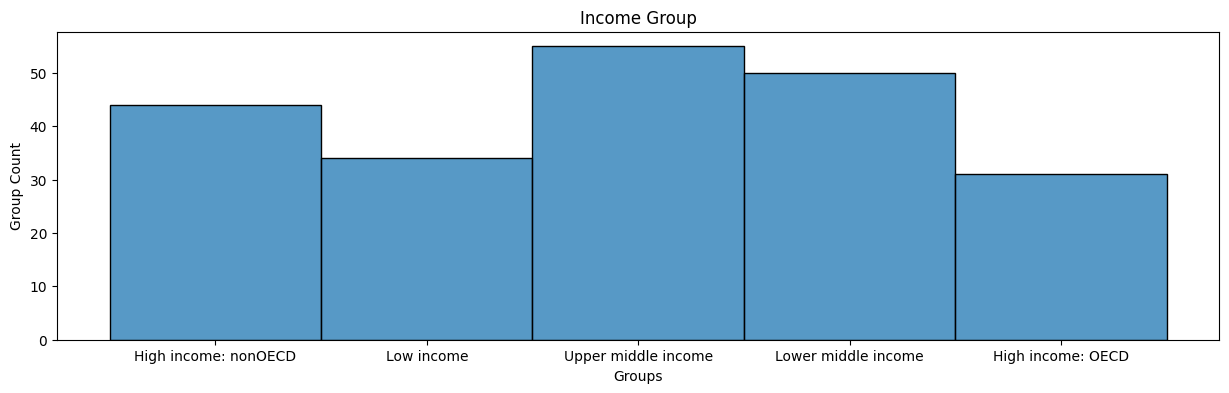

In [31]:
# Hostogram Plot to showcase which Income group most number of countries
plt.figure(figsize=(15,4))
IGhistplot= sns.histplot(data=Update_Stats_Country,x="Income Group",kde=False)
IGhistplot.set_xticklabels(IGhistplot.get_xticklabels(),rotation=0)
plt.title("Income Group")
plt.xlabel("Groups")
plt.ylabel("Group Count")
plt.show()

**Observation:**

From the histogram above we can see that most countries in this data set are in Upper Middle Income Group

***Let us now depict the respective investments made by countries within distinct income groups across varying levels of education.***

###**Expenditure on Education**

Expenditure on education refers to expenditure on core educational goods and services, such as teaching staff, school buildings, or school books and teaching materials, and peripheral educational goods and services such as ancillary services, general administration and other activities. it is an investment that can foster
economic growth, enhance productivity, contribute to
personal and social development and reduce social
inequality. The proportion of total financial resources
devoted to education is one of the key choices made by
governments, enterprises, students and their families. The
demand for high-quality education, which can translate
into higher costs per student.

#### Chart - 2

<ipython-input-30-02607f56aa42>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


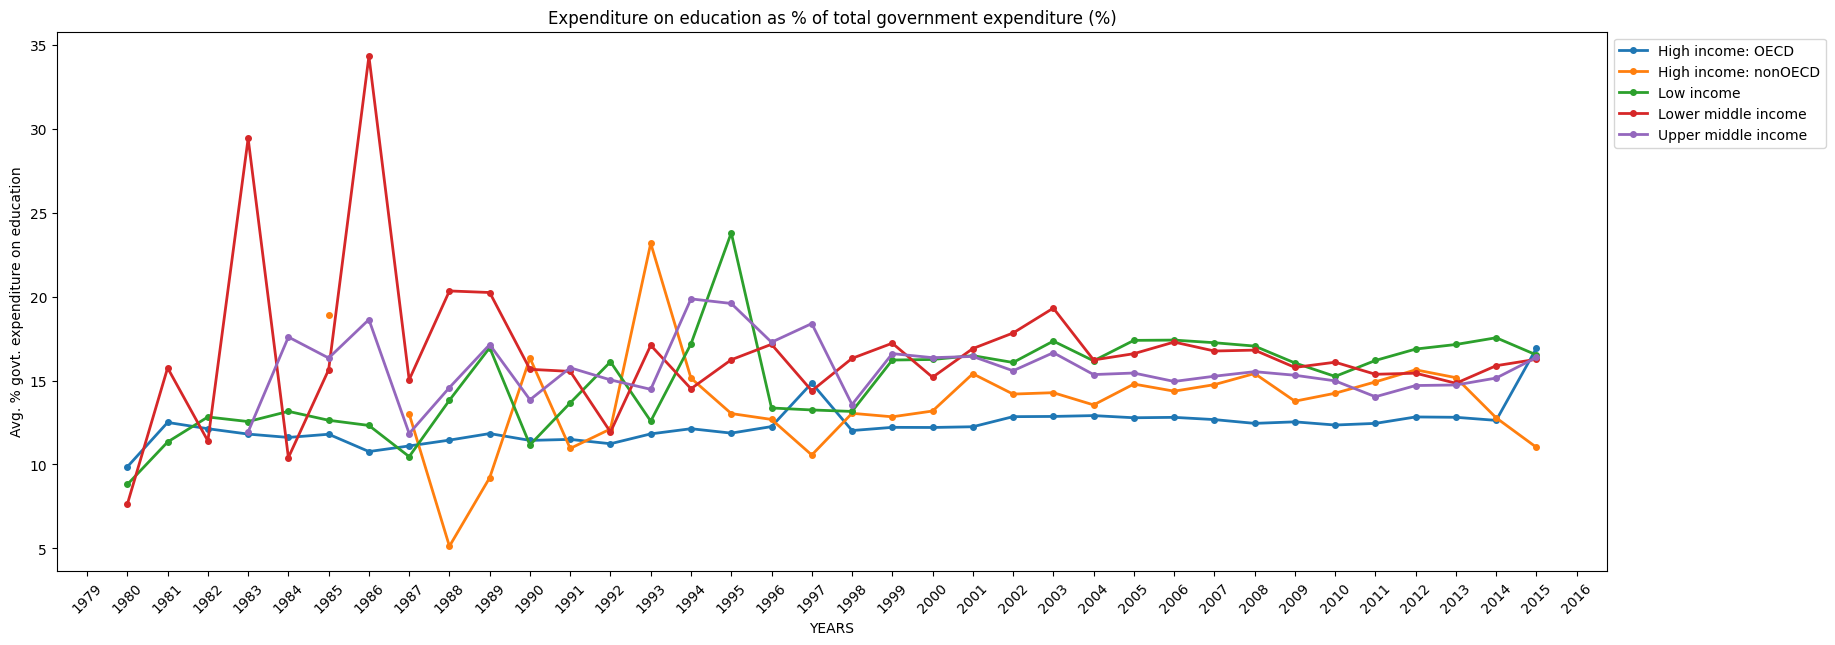

In [32]:
# Ploting graph below illustrating the percentage of total government expenditure allocated to education across various income groups
income_group_plot('Expenditure on education as % of total government expenditure (%)','Avg. % govt. expenditure on education')

**Observation:**

In the above illustration we can see a 3 significant spike in investement done by countries of Lower Middle Income group between years 1980-1981,1982-1983, 1985-1986. The percentage of investement done by High Income countries have been faily constant, ony increasing in last decade.

#### Chart - 3

<ipython-input-30-02607f56aa42>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


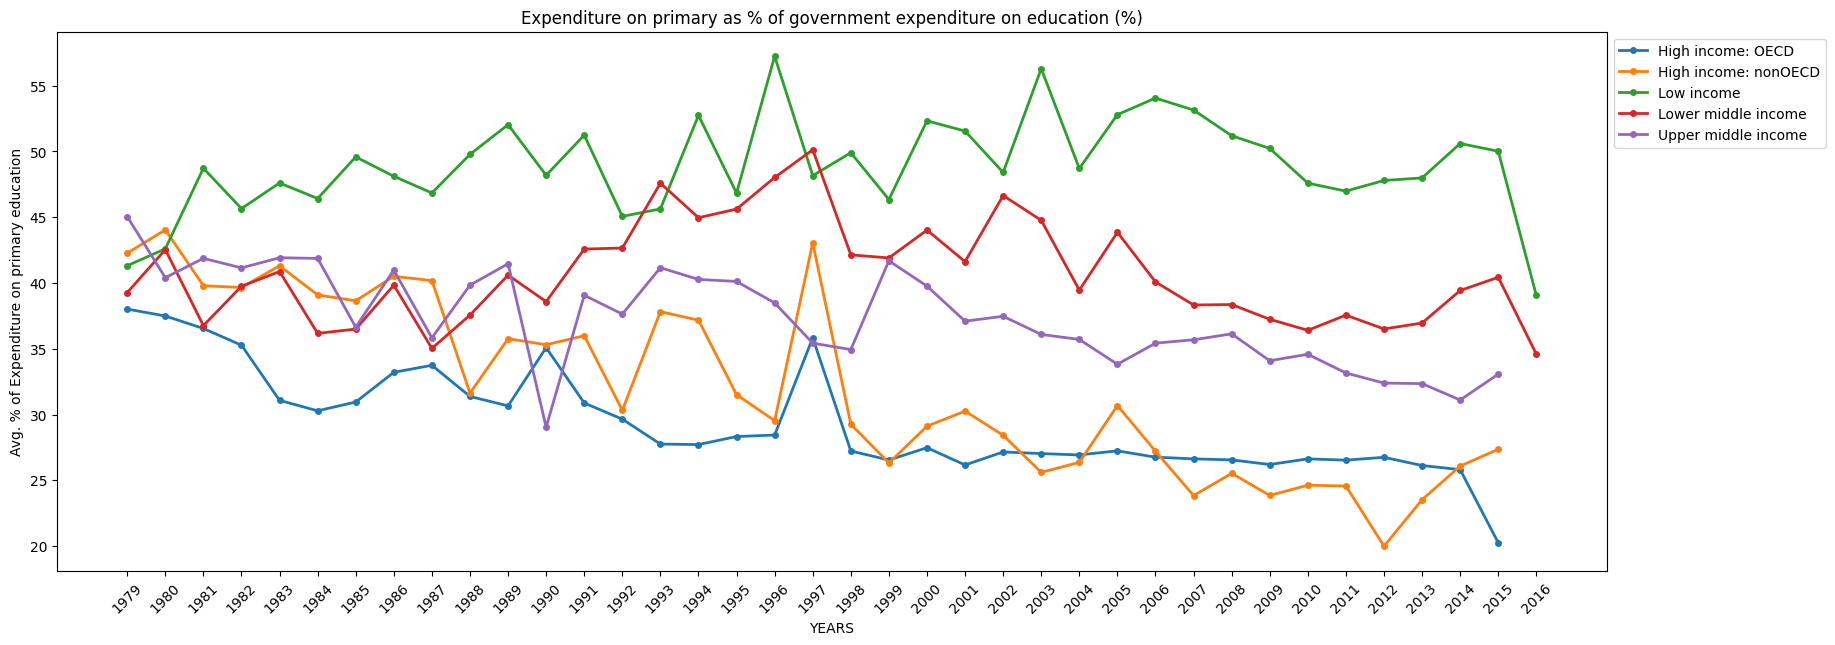

In [33]:
# Ploting graph below presenting the percentaage of Expenditure on primary level of the government's expenditure on education
income_group_plot('Expenditure on primary as % of government expenditure on education (%)','Avg. % of Expenditure on primary education')

**Observation:**

In the preceding illustration, the allocation of funds to primary education is evident. Notably, Lower Income countries have prioritized substantial investments in primary education, primarily aimed at enhancing the overall literacy rates within their respective nations.

#### Chart - 4

<ipython-input-30-02607f56aa42>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


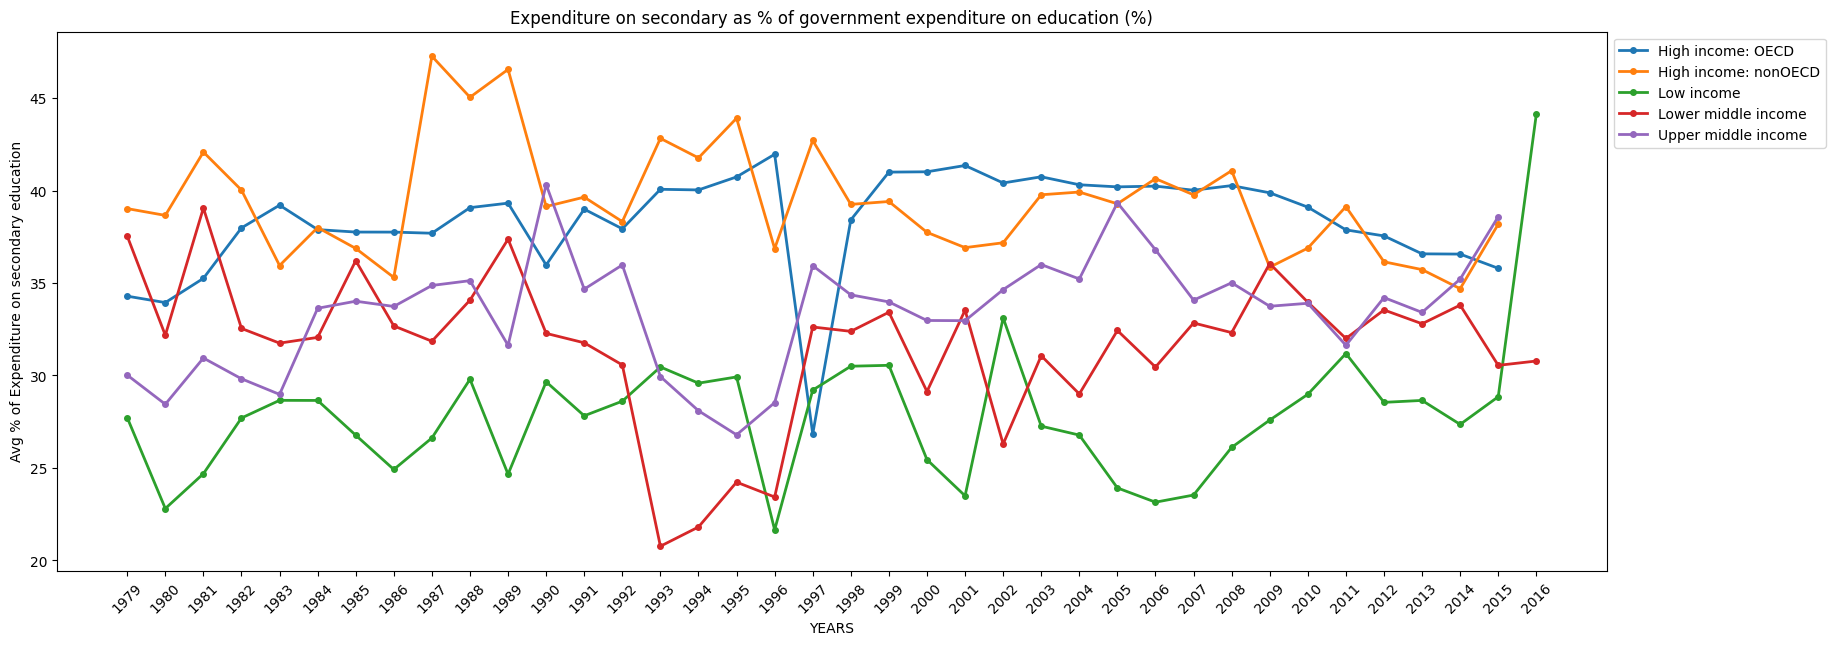

In [34]:
# Ploting graph below illustrating the percentage of total government expenditure allocated to secondary education across various income groups
income_group_plot('Expenditure on secondary as % of government expenditure on education (%)','Avg % of Expenditure on secondary education')

**Observation:**

As of the above graph, the High Income and Upper Middle Income countries have invested in secondary grade education quite early. We can see even the Low Income countries have show significant increase after year 2007.

#### Chart - 5

<ipython-input-30-02607f56aa42>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


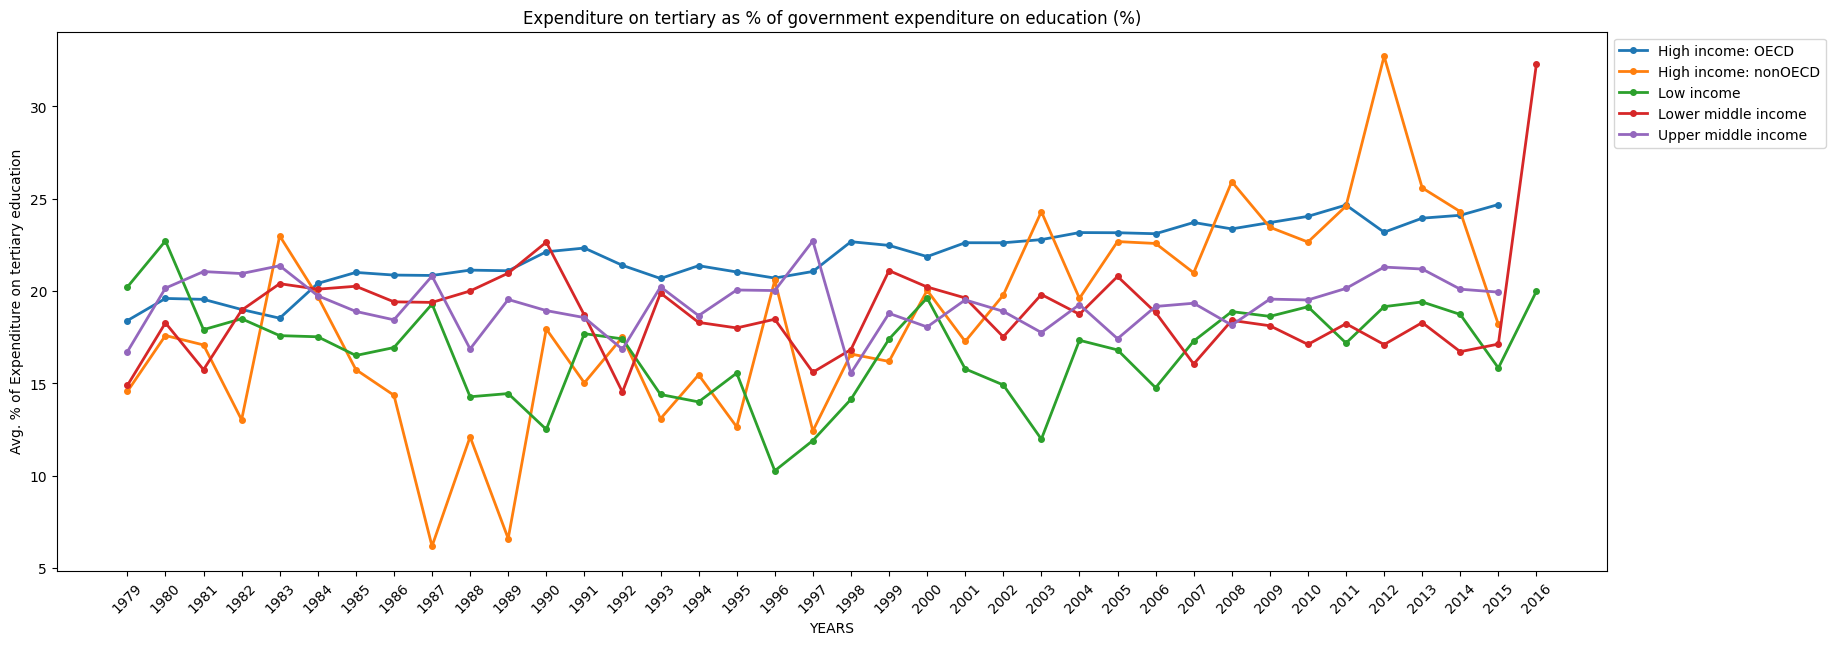

In [35]:
# Ploting graph below illustrating the percentage of total government expenditure allocated to tertiary education across various income groups
income_group_plot('Expenditure on tertiary as % of government expenditure on education (%)','Avg. % of Expenditure on tertiary education')

**Observation:**

The investement in tertiary level education by countries have been on a rise constantly, and a significant increase is seen by the Lower Middle Income countries, understanding the importance of good college education for future of their country.

###**Cumulative Drop-Out Rate**

The percentage of students failing to complete a particular school or college course. The drop rate to the last grade of secondary education is chosen on purpose because this is the point where most of the students drop out of their schools, especially in Lower middle and Lower Income Group countries where children have to support their family financially and giving up on their education.

#### Chart - 6

<ipython-input-30-02607f56aa42>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


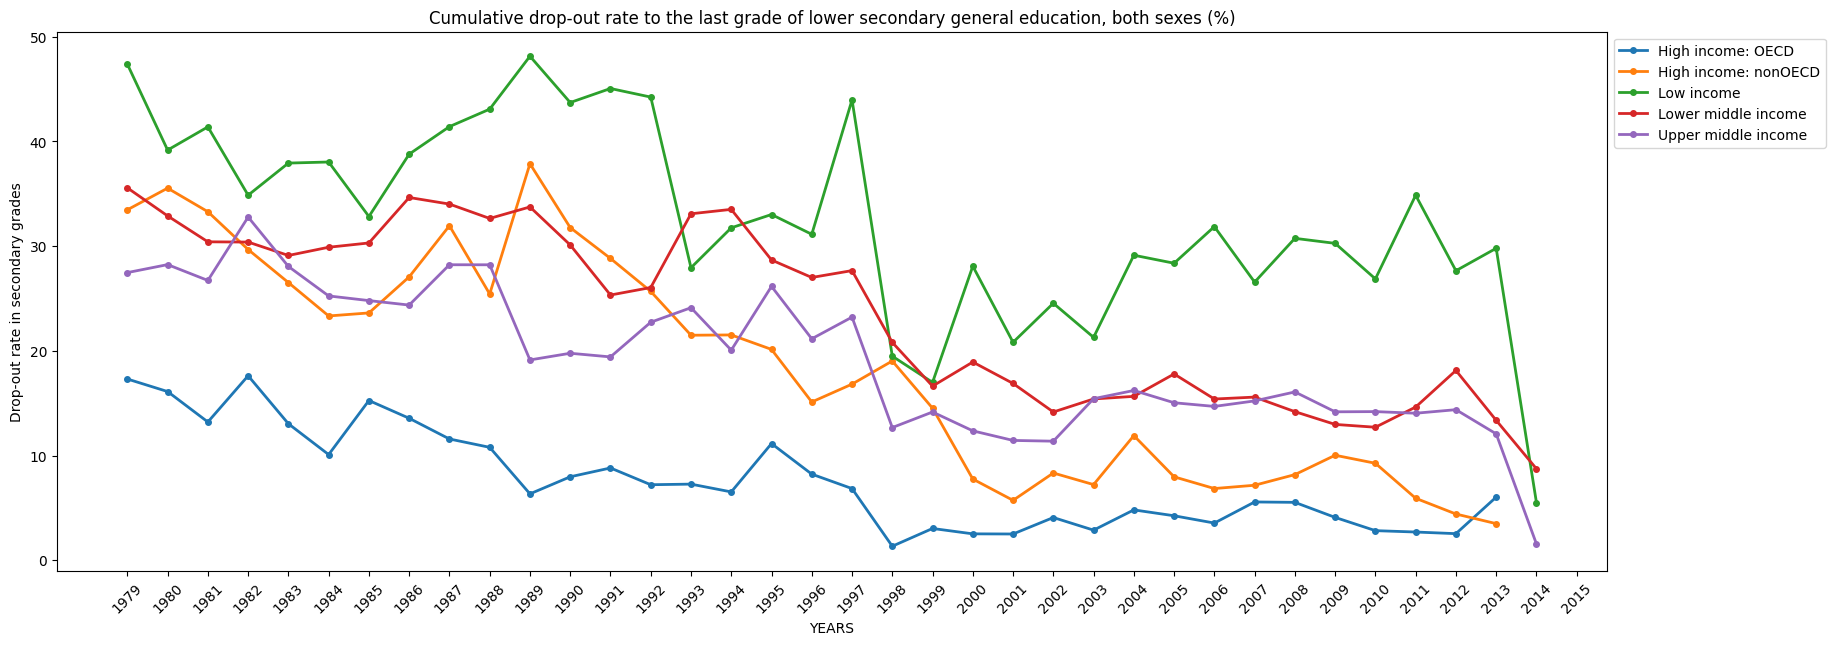

In [36]:
# Ploting graph below illustrating the cumulative drop out rate of both sexes across various income groups
income_group_plot('Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)','Drop-out rate in secondary grades')

**Observation:**

The above graph we can see a significant drop in drop-out rate in secodary level.

#### Chart - 7

<ipython-input-30-02607f56aa42>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


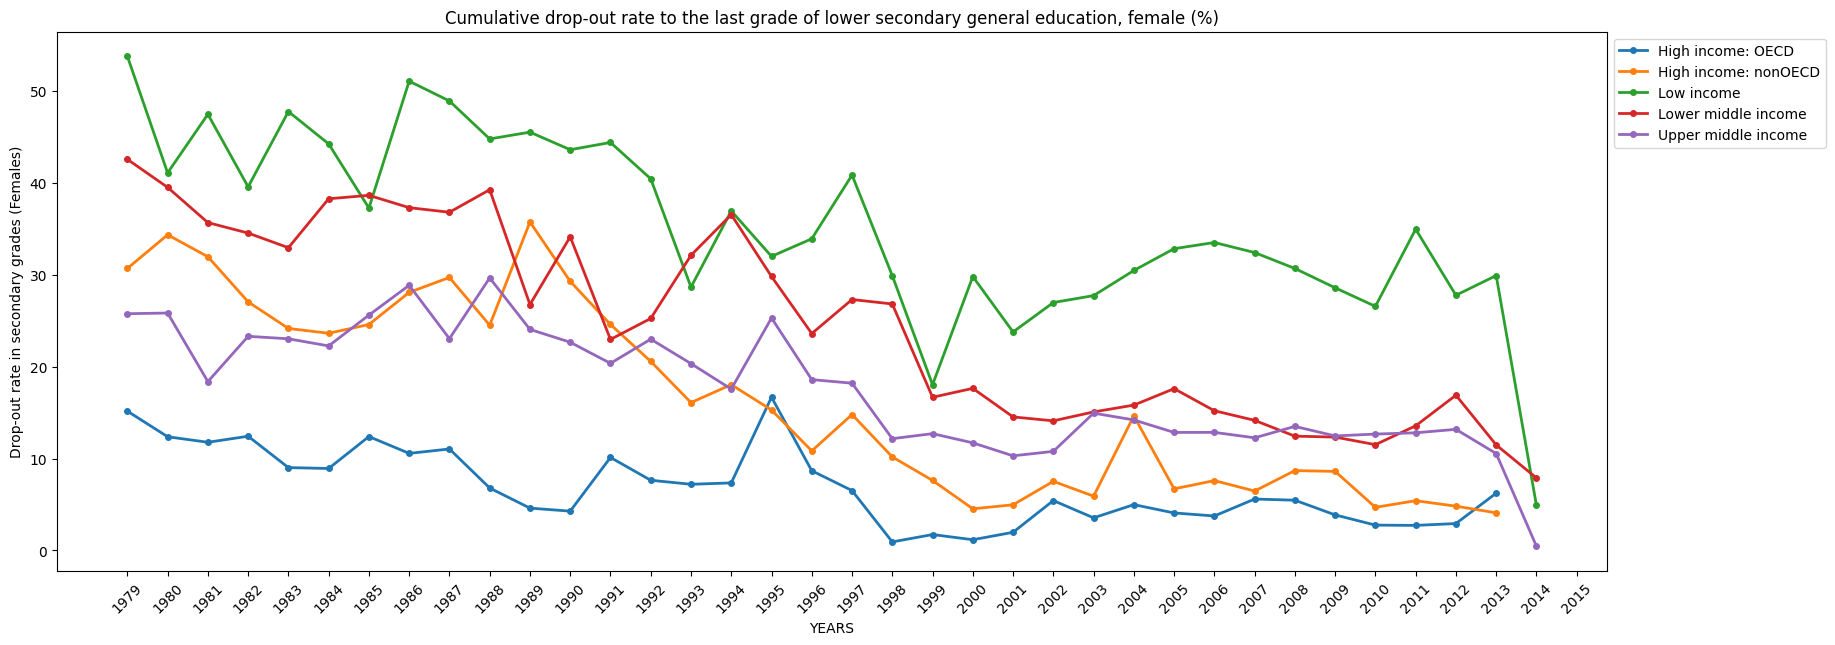

In [37]:
# Ploting graph below illustrating the cumulative drop out rate of female population across various income groups
income_group_plot('Cumulative drop-out rate to the last grade of lower secondary general education, female (%)','Drop-out rate in secondary grades (Females)')

**Observation:**

From the above illustration we can make out how high was the drop out rate of female population in secodary level education. But we can see great improvement in girl education especially in Low Income group countries, where the drop-out rate was highest but cureently its very low.

### **In the above plots we saw the data as per the income groups in each countries.**
###**Now we wil see the performance of some developing countries along with a developed country**

### **Now presenting a focused visualization exclusively for developing countries, with the benchmark references of the United States of America as a developed nation and Finland, renowned for possessing one of the world's premier education systems.**

In [38]:
Countries = ["India", "United States", "United Kingdom","South Africa", "Japan","Finland","China"]

Indicators = ["UIS.E.0.T", "SE.PRE.PRIV.ZS",
              # Early Childhood Education
              "SE.XPD.TOTL.GD.ZS", "SE.XPD.TOTL.GB.ZS",
              # Expenditures
              "SE.ADT.LITR.ZS", "UIS.LP.AG15T99",
              # Literacy
              "SP.PRE.TOTL.IN", "SP.PRM.TOTL.IN", "SP.SEC.TOTL.IN", "SP.TER.TOTL.IN",
              # Population
              "SE.PRM.ENRL.TC.ZS","SE.SEC.ENRL.TC.ZS",
              #Pupil-Tecaher Ratio
              "NY.GDP.PCAP.KD"
              #GDP per capita
              ]

def columnwise_data(indicator_code):
    df_countrywise = Update_Stats_Data[Update_Stats_Data["Indicator Code"] == indicator_code]
    df_countrywise = df_countrywise.loc[df_countrywise['Country Name'].isin(Countries)]
    df_countrywise.dropna(how='all', axis = "columns", inplace=True)
    df_countrywise.reset_index(inplace = True)
    title = df_countrywise["Indicator Name"][0]
    df_countrywise = df_countrywise.T
    df_countrywise.reset_index(inplace=True)
    new_columns = [ "Year", "China","Finland", "India", "Japan", "South Africa", "United Kingdom", "United States"]
    df_countrywise.columns = new_columns
    df_countrywise.drop(0, inplace = True)
    return df_countrywise, title

def rowwise_data(indicator_code):
    df_countrywise, title = columnwise_data(indicator_code)
    cols = list(df_countrywise["Year"])
    df_countrywise = df_countrywise.T
    df_countrywise.reset_index(inplace=True)
    df_countrywise.columns = ["Country_Name"] + cols
    df_countrywise =df_countrywise.drop(['Country Name','Country Code','Indicator Name'],axis=1)
    df_countrywise.drop(0, inplace = True)
    return df_countrywise, title

In [39]:
# A simple code to check the code
temp, t = rowwise_data(Indicators[1])
print("-" * 80+f"\n{t.center(80)}\n"+"-" * 80)
temp

--------------------------------------------------------------------------------
  Percentage of enrolment in pre-primary education in private institutions (%)  
--------------------------------------------------------------------------------


,Country_Name,Indicator Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,China,SE.PRE.PRIV.ZS,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,30.660101,34.26405,36.98642,39.678768,42.673012,47.014599,49.473961,50.267601,51.101719,52.469212
2,Finland,SE.PRE.PRIV.ZS,0.0,0.0,0.0,25.867889,NaN,NaN,NaN,NaN,...,8.5365,8.6253,8.66839,8.40617,8.8419,8.66898,8.48419,8.63504,8.51309,8.34692
3,India,SE.PRE.PRIV.ZS,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.341537,76.528137,74.440773
4,Japan,SE.PRE.PRIV.ZS,75.363518,75.923576,76.596039,75.941681,75.692436,75.10585,74.490334,74.193039,...,66.647926,67.364349,68.186142,69.000183,69.618698,70.331718,71.319504,71.864059,72.700996,NaN
5,South Africa,SE.PRE.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.64807,5.36282,5.25834,5.82277,6.38362,6.09963,6.14065,6.25073,NaN
6,United Kingdom,SE.PRE.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,5.39608,NaN,NaN,...,29.042259,NaN,29.47846,28.14855,20.978951,28.84973,37.463909,52.896641,45.159859,NaN
7,United States,SE.PRE.PRIV.ZS,30.232559,31.34041,NaN,31.81818,NaN,33.1064,31.89793,33.333328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.94574,40.444901


###**Enrolment in Early Childhood Education**

Early childhood education (ECE), which addresses the period from birth to 8 years old, is important because it capitalizes on a period of rich brain development for children and, when it is of good quality, can help them achieve their full potential. It can lay the foundation for good health and nutrition, learning and educational success, social-emotional learning, and economic productivity throughout life. Despite the evidence for these social, human and economic developmental gains, it is still often given low priority in education policy and investment and, where it does exist, may exclude marginalized groups.

In [40]:
# Calling columnwise_data() to get a columnwise matrix along with the title
# for first indicator in the 'Indicators' list.
Data_Frame_1 , title_1  = columnwise_data(Indicators[0])

# Displaying Title of Indicator.
print("-" * 80+f"\n{title_1.center(80)}\n"+"-" * 80)

# Displaying the DataFrame recieved.
Data_Frame_1= Data_Frame_1.drop(Data_Frame_1.index[:4])
Data_Frame_1

--------------------------------------------------------------------------------
          Enrolment in early childhood education, both sexes (number)           
--------------------------------------------------------------------------------


,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1998,NaN,118995.0,NaN,NaN,NaN,NaN,NaN
6,1999,24030344.0,124640.0,NaN,NaN,NaN,NaN,7183122.0
7,2000,23262588.0,126630.0,NaN,3425697.0,NaN,NaN,7110066.0
8,2001,22441806.0,137985.0,2617403.0,3463487.0,NaN,NaN,7538720.0
9,2002,20218371.0,139849.0,4623168.0,3492456.0,518985.0,NaN,7667685.0
10,2003,20360245.0,137824.0,5507559.0,3555478.0,NaN,NaN,NaN
11,2004,NaN,138931.0,5050006.0,3586547.0,NaN,NaN,7435568.0
12,2005,NaN,137431.0,4761485.0,3615999.0,685749.0,NaN,7361682.0
13,2006,NaN,139870.0,5264053.0,3630184.0,NaN,989596.0,7342289.0
14,2007,22638509.0,143253.0,5366340.0,3614874.0,NaN,1004677.0,7512518.0


In [41]:
# Now we need to replace the 'NaN' entries with some meaningful
# value since they might affect the visualization to make it inconsistent.

# Firstly using a fillna() with 'ffill' method to perform upward fill for 'NaN' values,
# this will fill 'NaN' with the nearest value above it in the column.
Data_Frame_1.fillna(method = "ffill", inplace = True)

# Now using a fillna() with 'bfill' method to perform downward fill for 'NaN' values,
# this will fill 'NaN' with the nearest value below it in the column.
Data_Frame_1.fillna(method = "bfill", inplace = True)

# Matric after filling NaNs.
Data_Frame_1

,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1998,24030344.0,118995.0,2617403.0,3425697.0,518985.0,9.895960e+05,7.183122e+06
6,1999,24030344.0,124640.0,2617403.0,3425697.0,518985.0,9.895960e+05,7.183122e+06
7,2000,23262588.0,126630.0,2617403.0,3425697.0,518985.0,9.895960e+05,7.110066e+06
8,2001,22441806.0,137985.0,2617403.0,3463487.0,518985.0,9.895960e+05,7.538720e+06
9,2002,20218371.0,139849.0,4623168.0,3492456.0,518985.0,9.895960e+05,7.667685e+06
10,2003,20360245.0,137824.0,5507559.0,3555478.0,518985.0,9.895960e+05,7.667685e+06
11,2004,20360245.0,138931.0,5050006.0,3586547.0,518985.0,9.895960e+05,7.435568e+06
12,2005,20360245.0,137431.0,4761485.0,3615999.0,685749.0,9.895960e+05,7.361682e+06
13,2006,20360245.0,139870.0,5264053.0,3630184.0,685749.0,9.895960e+05,7.342289e+06
14,2007,22638509.0,143253.0,5366340.0,3614874.0,685749.0,1.004677e+06,7.512518e+06


#### Chart - 8

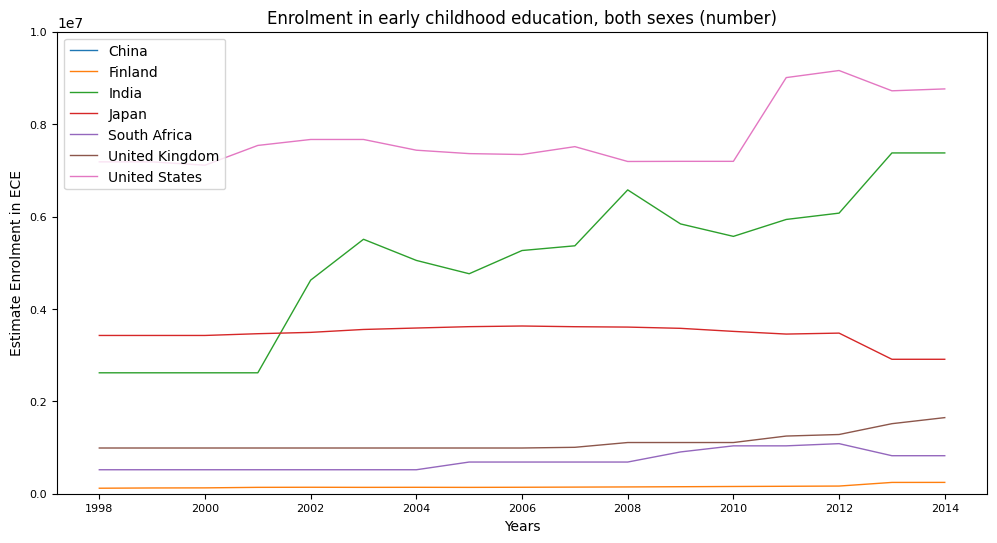

In [42]:
# Using plot() from pandas module to plot a line graph,
# this plot function is just the extension to the plot() in matplotlib.

plot_params = {'xlabel': "Years",'ylabel': "Estimate Enrolment in ECE",'ylim': (0, 1e7),'figsize': (12, 6),'fontsize': 8,'linewidth': 1}

# Plot the line graph
Data_Frame_1.plot(x="Year", kind='line', title=title_1, **plot_params)

# Show the plot
plt.show()

**Observation:**

In the above graph we can see USA focused in early enrolment of children in education.

India has shown really great increase in number of Early Enrolment from year 1998 to 2014.

Some countries like Finalnd have low Early Enrolment as they believe that children should start education late.

In [43]:
# Extracting Indicator matrix.
Data_Frame_2 , title_2  = columnwise_data(Indicators[2])

# Displaying Title of Indicator.
print("-" * 80+f"\n{title_2.center(80)}\n"+"-" * 80)

# Displaying the DataFrame recieved.
Data_Frame_2 = Data_Frame_2.drop(Data_Frame_2.index[:4])
Data_Frame_2

--------------------------------------------------------------------------------
              Government expenditure on education as % of GDP (%)               
--------------------------------------------------------------------------------


,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1970,NaN,5.40947,NaN,NaN,NaN,NaN,NaN
6,1971,1.38699,5.32742,NaN,3.71648,NaN,5.03205,NaN
7,1972,1.60627,5.00447,NaN,4.07991,NaN,5.15938,NaN
8,1973,1.64855,5.0896,NaN,4.11199,NaN,5.44861,NaN
9,1974,1.75972,4.47899,NaN,4.12426,NaN,5.391,NaN
10,1975,1.70822,5.0295,NaN,4.73971,NaN,6.26878,NaN
11,1976,1.81572,5.22445,NaN,4.93977,NaN,6.44037,NaN
12,1977,1.74954,NaN,NaN,4.92031,NaN,6.0845,NaN
13,1978,1.95815,NaN,NaN,4.98988,NaN,NaN,NaN
14,1979,2.14829,4.79335,NaN,5.13707,NaN,NaN,NaN


In [44]:
# Cleaning data to replace null values using backward and forward filling methods.
# First using "ffill" on data.
Data_Frame_2.fillna(method = "ffill", inplace = True)

# now using "bfill" on data.
Data_Frame_2.fillna(method = "bfill", inplace = True)

# Displaying cleaned matrix.
Data_Frame_2

,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1970,1.38699,5.40947,3.30847,3.71648,5.34765,5.03205,4.58326
6,1971,1.38699,5.32742,3.30847,3.71648,5.34765,5.03205,4.58326
7,1972,1.60627,5.00447,3.30847,4.07991,5.34765,5.15938,4.58326
8,1973,1.64855,5.08960,3.30847,4.11199,5.34765,5.44861,4.58326
9,1974,1.75972,4.47899,3.30847,4.12426,5.34765,5.39100,4.58326
10,1975,1.70822,5.02950,3.30847,4.73971,5.34765,6.26878,4.58326
11,1976,1.81572,5.22445,3.30847,4.93977,5.34765,6.44037,4.58326
12,1977,1.74954,5.22445,3.30847,4.92031,5.34765,6.08450,4.58326
13,1978,1.95815,5.22445,3.30847,4.98988,5.34765,6.08450,4.58326
14,1979,2.14829,4.79335,3.30847,5.13707,5.34765,6.08450,4.58326


###**Government Expenditure on Education**

This refers to the component of education expenditure that comes from national, regional, and local government units to finance and/or produce educational services. A country’s education expenditure comes from three main sources: government or public sector, private sector (households and firms), and rest of the world (through grants and aid). These funds may be used for different levels of education including preprimary, primary, secondary, technical-vocational, tertiary, and nonformal. Educational expenditure includes current expenditures (such as teaching and nonteaching staff compensation, textbooks and other teaching materials, and other goods and services) and capital expenditures.

#### Chart - 9

<Figure size 1200x600 with 0 Axes>

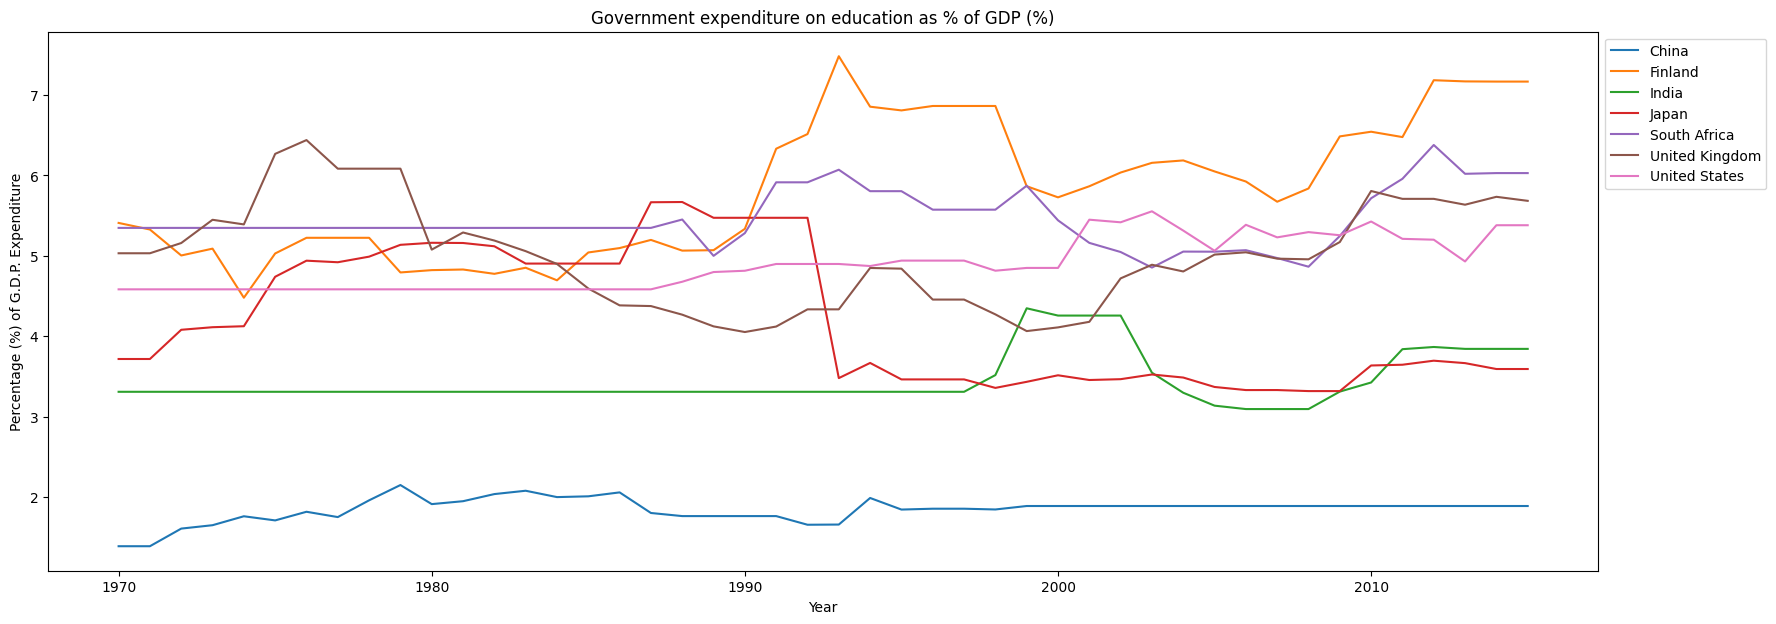

In [45]:
# Plotting the bar graph
plt.figure(figsize=(12, 6))
Data_Frame_2.plot(x='Year', y=['China', 'Finland', 'India', 'Japan', 'South Africa', 'United Kingdom', 'United States'], kind='line')
plt.title(title_2)
plt.xlabel('Year')
plt.ylabel('Percentage (%) of G.D.P. Expenditure')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observations:**

Finland has a high percentage of expenditure on education, thus increasing its education quality.

United States has showed a gradual increase in expenditure on education showing significant increase after year 2000. Building finest intitutions in all areas of studies.

Japan and India have similar share of expenditure on education, but in recent years India has worked a lot in education field, thus investing more than Japan.

South Africa has higher percentage of expenditure of GDP, still their education level is not upto the mark. Its education system is considered one of the worst among the world. Only 20% of the country's 25,000 government schools provide a good quality education, while 80% are dysfunctional.

United Kingdom has some of the world's best educational institution, thus showing its high percent of expenditure on education.

###**Pupil-Teacher Ratio**

It is the number of students who attend a school or university divided by the number of teachers in the institution. For example, a student–teacher ratio of 10:1 indicates that there are 10 students for every one teacher. Factors that can affect the relationship between student–teacher ratio and class size include the number of teachers with non-teaching duties, the number of classes per teacher, and the number of teachers per class. A low student–teacher ratio is often used as a selling point to those choosing schools for tertiary education. On the other hand, high student–teacher ratio is often cited for criticizing proportionately underfunded schools or school systems, or as evidence of the need for legislative change or more funding for education. It is an important factor in quality of education.


In [46]:
# Extracting Indicator matrix.
Data_Frame_3 , title_3  = columnwise_data(Indicators[10])

# Displaying Title of Indicator.
print("-" * 80+f"\n{title_3.center(80)}\n"+"-" * 80)

# Displaying the DataFrame recieved.
Data_Frame_3 = Data_Frame_3.drop(Data_Frame_3.index[:4])
Data_Frame_3

--------------------------------------------------------------------------------
           Pupil-teacher ratio in primary education (headcount basis)           
--------------------------------------------------------------------------------


,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1970,28.86952,NaN,NaN,NaN,NaN,NaN,NaN
6,1971,29.147289,22.24827,41.452141,26.39259,NaN,23.32729,NaN
7,1972,27.377781,21.782921,41.62027,25.493481,NaN,22.637461,NaN
8,1973,28.53388,19.76158,42.53532,25.29491,NaN,21.721239,NaN
9,1974,29.002781,18.50725,42.520248,24.848089,NaN,21.09322,NaN
10,1975,29.290859,17.476139,41.931728,24.82798,NaN,20.55043,NaN
11,1976,29.01038,18.52441,42.113049,25.74778,NaN,20.03306,NaN
12,1977,28.371149,16.006571,NaN,25.791269,29.469561,20.107639,NaN
13,1978,27.970909,16.840851,NaN,25.763651,28.47888,19.943769,NaN
14,1979,27.98316,16.18491,42.898319,25.7897,27.7827,19.369011,NaN


In [47]:
# Cleaning data to replace null values using backward and forward filling methods.
# First using "ffill" on data.
Data_Frame_3.fillna(method = "ffill", inplace = True)

# now using "bfill" on data.
Data_Frame_3.fillna(method = "bfill", inplace = True)

# Displaying cleaned matrix.
Data_Frame_3

,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1970,28.869520,22.248270,41.452141,26.392590,29.469561,23.327290,14.021200
6,1971,29.147289,22.248270,41.452141,26.392590,29.469561,23.327290,14.021200
7,1972,27.377781,21.782921,41.620270,25.493481,29.469561,22.637461,14.021200
8,1973,28.533880,19.761580,42.535320,25.294910,29.469561,21.721239,14.021200
9,1974,29.002781,18.507250,42.520248,24.848089,29.469561,21.093220,14.021200
10,1975,29.290859,17.476139,41.931728,24.827980,29.469561,20.550430,14.021200
11,1976,29.010380,18.524410,42.113049,25.747780,29.469561,20.033060,14.021200
12,1977,28.371149,16.006571,42.113049,25.791269,29.469561,20.107639,14.021200
13,1978,27.970909,16.840851,42.113049,25.763651,28.478880,19.943769,14.021200
14,1979,27.983160,16.184910,42.898319,25.789700,27.782700,19.369011,14.021200


In [48]:
# Extracting Indicator matrix.
Data_Frame_4 , title_4  = columnwise_data(Indicators[11])

# Displaying Title of Indicator.
print("-" * 80+f"\n{title_4.center(80)}\n"+"-" * 80)

# Displaying the DataFrame recieved.
Data_Frame_4 = Data_Frame_4.drop(Data_Frame_4.index[:4])
Data_Frame_4

--------------------------------------------------------------------------------
          Pupil-teacher ratio in secondary education (headcount basis)          
--------------------------------------------------------------------------------


,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1970,20.597469,NaN,NaN,NaN,NaN,NaN,NaN
6,1971,21.83943,15.80584,21.92318,18.245119,NaN,NaN,NaN
7,1972,23.00333,15.62673,21.48304,18.163919,NaN,NaN,21.09771
8,1973,21.237101,15.20766,21.237631,17.91445,NaN,NaN,NaN
9,1974,19.93684,14.59609,NaN,17.8363,NaN,NaN,NaN
10,1975,20.09417,14.05784,21.61648,17.337681,NaN,NaN,NaN
11,1976,20.959249,NaN,NaN,17.28632,NaN,NaN,NaN
12,1977,21.02231,13.99688,NaN,17.327789,NaN,NaN,NaN
13,1978,20.919901,15.306,NaN,17.31196,NaN,NaN,NaN
14,1979,20.22543,13.66129,NaN,17.269369,NaN,NaN,NaN


In [49]:
# Cleaning data to replace null values using backward and forward filling methods.
# First using "ffill" on data.
Data_Frame_4.fillna(method = "ffill", inplace = True)

# now using "bfill" on data.
Data_Frame_4.fillna(method = "bfill", inplace = True)

# Displaying cleaned matrix.
Data_Frame_4

,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1970,20.597469,15.80584,21.923180,18.245119,25.961840,12.24197,21.09771
6,1971,21.839430,15.80584,21.923180,18.245119,25.961840,12.24197,21.09771
7,1972,23.003330,15.62673,21.483040,18.163919,25.961840,12.24197,21.09771
8,1973,21.237101,15.20766,21.237631,17.914450,25.961840,12.24197,21.09771
9,1974,19.936840,14.59609,21.237631,17.836300,25.961840,12.24197,21.09771
10,1975,20.094170,14.05784,21.616480,17.337681,25.961840,12.24197,21.09771
11,1976,20.959249,14.05784,21.616480,17.286320,25.961840,12.24197,21.09771
12,1977,21.022310,13.99688,21.616480,17.327789,25.961840,12.24197,21.09771
13,1978,20.919901,15.30600,21.616480,17.311960,25.961840,12.24197,21.09771
14,1979,20.225430,13.66129,21.616480,17.269369,25.961840,12.24197,21.09771


#### Chart - 10

Pupil-teacher ratio in primary education (headcount basis)


<Figure size 1200x600 with 0 Axes>

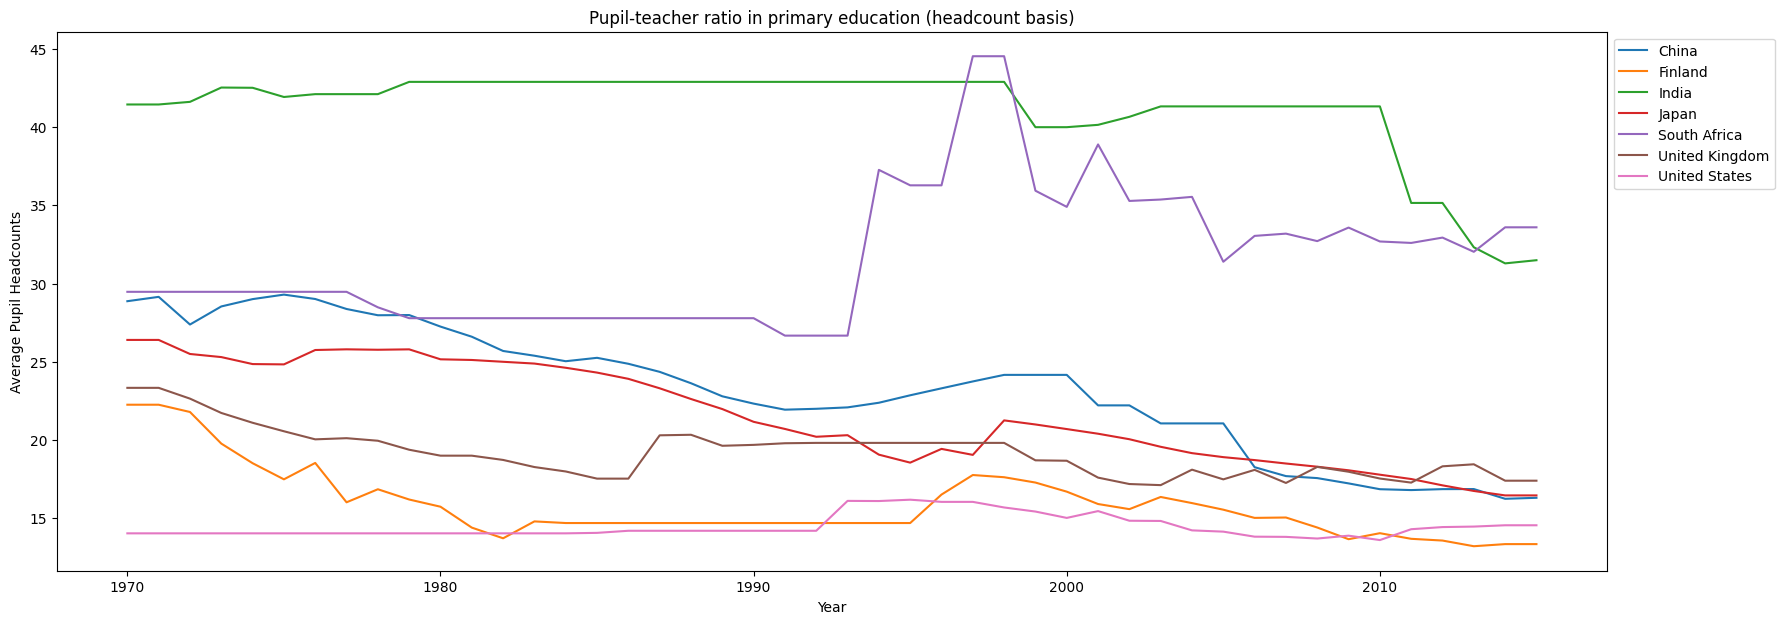

Pupil-teacher ratio in secondary education (headcount basis)


<Figure size 1200x600 with 0 Axes>

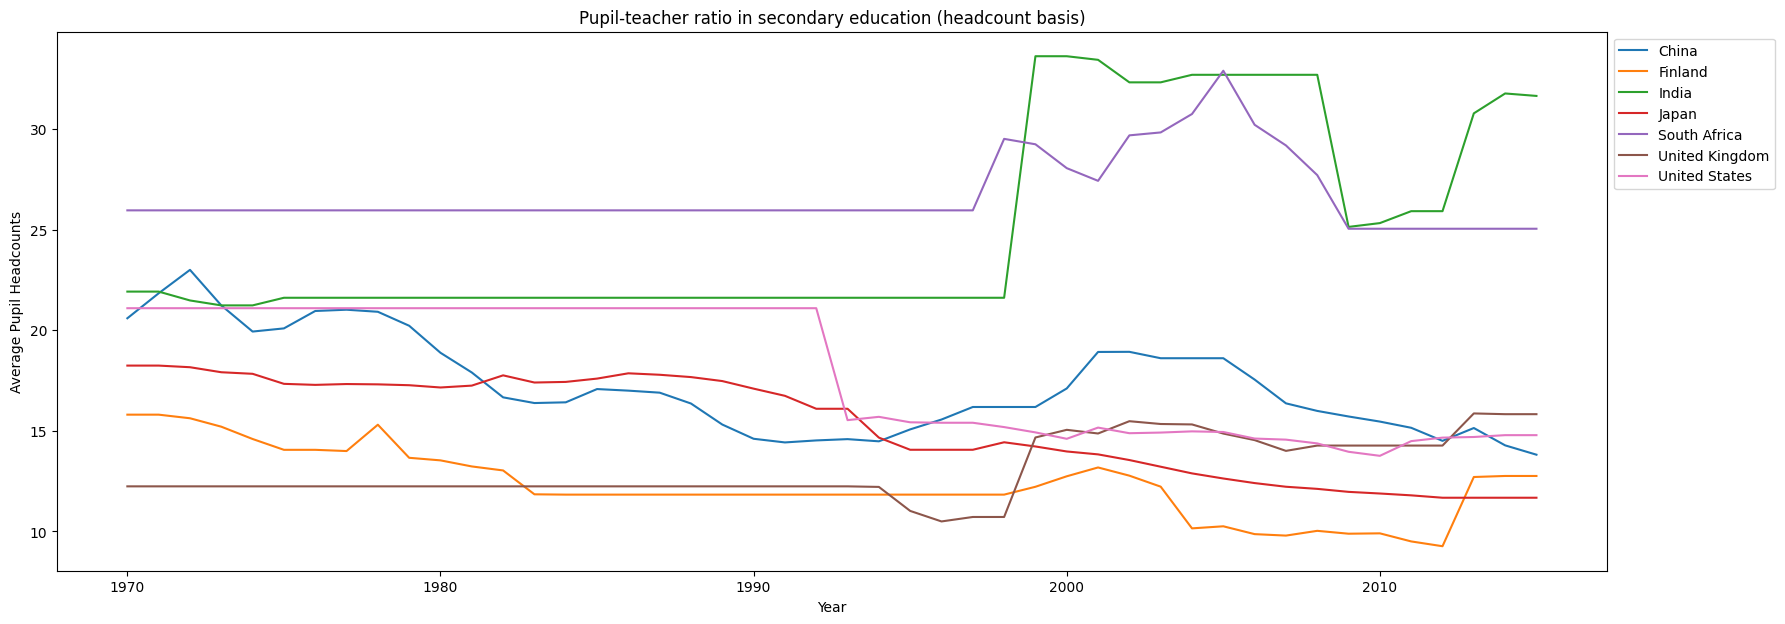

In [50]:
# Plotting the bar graph for Pupil to teacher ratio in Primary education
plt.figure(figsize=(12, 6))
print(title_3)
Data_Frame_3.plot(x='Year', y=['China', 'Finland', 'India', 'Japan', 'South Africa', 'United Kingdom', 'United States'], kind='line')
plt.title(title_3)
plt.xlabel('Year')
plt.ylabel('Average Pupil Headcounts')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plotting the bar graph for Pupil to teacher ratio in Secondary education
plt.figure(figsize=(12, 6))
print(title_4)
Data_Frame_4.plot(x='Year', y=['China', 'Finland', 'India', 'Japan', 'South Africa', 'United Kingdom', 'United States'], kind='line')
plt.title(title_4)
plt.xlabel('Year')
plt.ylabel('Average Pupil Headcounts')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observations:**

An examination of global trends reveals a consistent effort by nations to optimize the Pupil to Teacher ratio, recognizing its impact on the quality of education.

The United States has consistently maintained a low ratio, typically ranging between 20 to 10, indicative of their commitment to ensuring personalized attention and quality education for each student.

Finland, celebrated for its world-class education system, also emphasizes a low Pupil to Teacher ratio as a cornerstone of providing dedicated attention to students, contributing to the overall quality of education.

China, despite its immense population, has demonstrated remarkable success in steadily reducing the ratio. Post-1985, strategic population control measures resulted in a gradual decline, maintaining the ratio at approximately 30 pupils per teacher and further lowering it to 18 in subsequent years.

In contrast, India grapples with one of the highest Pupil to Teacher ratios globally, particularly exceeding 40 pupils per teacher in primary education. While efforts to reduce the ratio gained traction after 2010, there remains a pressing need for further initiatives to enhance the quality of education and individualized attention for each student.

South Africa experienced a surge in the ratio during the 1980s, attributed to a population explosion. With a peak nearing 45 pupils per teacher in primary education, a commendable recovery ensued, marked by a significant drop in birth rates. Subsequently, the ratio decreased to 34 in primary and 25 in secondary education.


###**Adult Literacy Rate**

The percentage of population aged 15 years and over who can both read and write with understanding a short simple statement on his/her everyday life. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Literacy is critical for promoting and communicating sustainable development and improving the capacity of people to address environment and development issues. It facilitates the achievement of environmental and ethical awareness, values, and skills consistent with sustainable development and effective public participation in decision-making.   This indicator provides a measure of the stock of literate persons within the adult population who are capable of using written words in daily life and to continue to learn. It reflects the accumulated accomplishment of education in spreading literacy. Any shortfall in literacy would provide indications of efforts required in the future to extend literacy to the remaining adult illiterate population.

In [51]:
# Extracting Indicator matrix.
Data_Frame_5 , title_5  = columnwise_data(Indicators[4])

# Displaying Title of Indicator.
print("-" * 80+f"\n{title_5.center(80)}\n"+"-" * 80)

# Displaying the DataFrame recieved.
Data_Frame_5 = Data_Frame_5.drop(Data_Frame_5.index[:4])
Data_Frame_5

--------------------------------------------------------------------------------
           Adult literacy rate, population 15+ years, both sexes (%)            
--------------------------------------------------------------------------------


,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1980,NaN,NaN,NaN,NaN,76.200493,NaN,NaN
6,1981,NaN,NaN,40.763592,NaN,NaN,NaN,NaN
7,1982,65.505089,NaN,NaN,NaN,NaN,NaN,NaN
8,1990,77.785057,NaN,NaN,NaN,NaN,NaN,NaN
9,1991,NaN,NaN,48.222069,NaN,NaN,NaN,NaN
10,1996,NaN,NaN,NaN,NaN,82.4021,NaN,NaN
11,2000,90.92021,NaN,NaN,NaN,NaN,NaN,NaN
12,2001,NaN,NaN,61.01456,NaN,NaN,NaN,NaN
13,2006,NaN,NaN,62.75447,NaN,NaN,NaN,NaN
14,2007,NaN,NaN,NaN,NaN,88.71725,NaN,NaN


In [52]:
# Cleaning data to replace null values using backward and forward filling methods.
# Dropping countries that are all null.
Data_Frame_5.dropna( how = "all", inplace = True, axis = 1)
# First using "ffill" on data.
Data_Frame_5.fillna(method = "ffill", inplace = True)

# now using "bfill" on data.
Data_Frame_5.fillna(method = "bfill", inplace = True)

# Displaying cleaned matrix.
Data_Frame_5

,Year,China,India,South Africa
5,1980,65.505089,40.763592,76.200493
6,1981,65.505089,40.763592,76.200493
7,1982,65.505089,40.763592,76.200493
8,1990,77.785057,40.763592,76.200493
9,1991,77.785057,48.222069,76.200493
10,1996,77.785057,48.222069,82.402100
11,2000,90.920210,48.222069,82.402100
12,2001,90.920210,61.014560,82.402100
13,2006,90.920210,62.754470,82.402100
14,2007,90.920210,62.754470,88.717250


#### Chart - 11

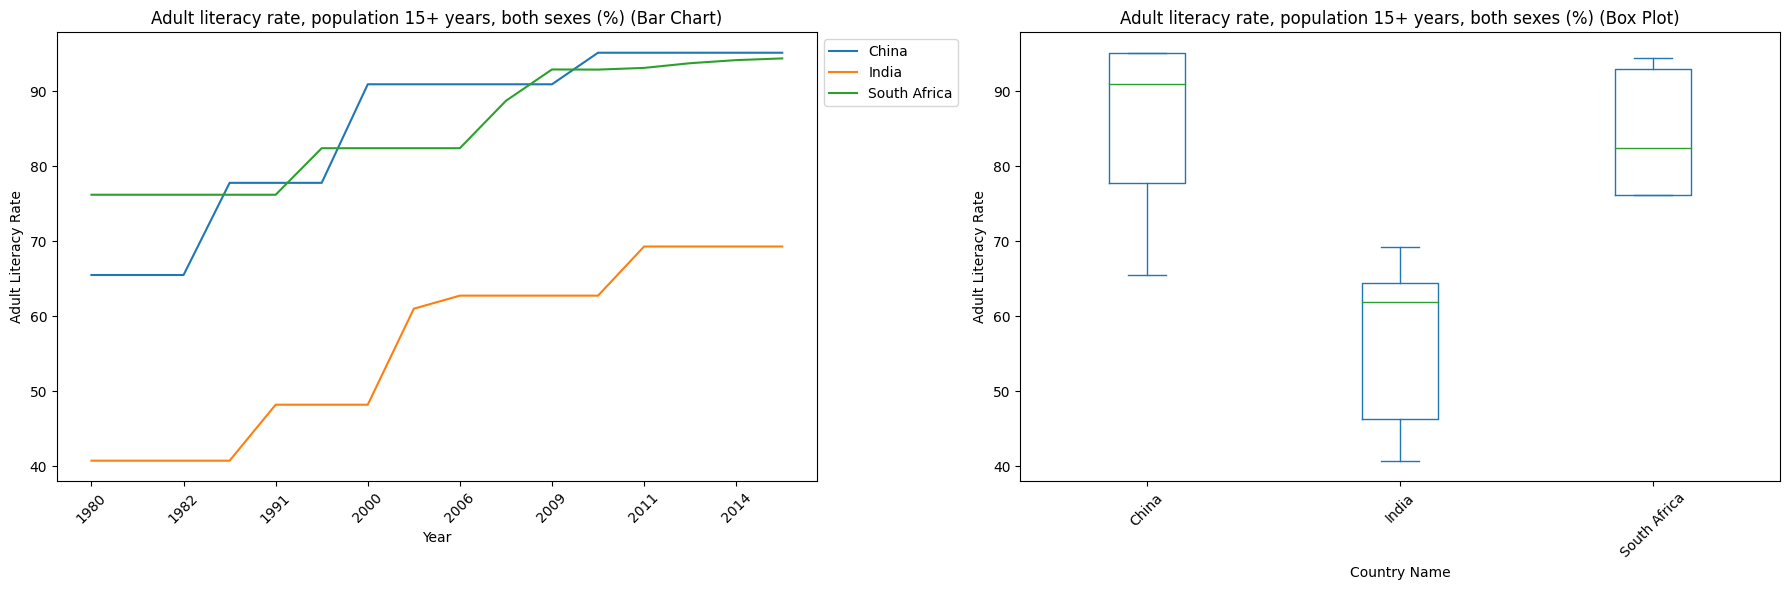

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the bar chart
Data_Frame_5.plot(x='Year', y=['China', 'India', 'South Africa'], ax=axs[0], kind='line', rot=45)
axs[0].set_title(title_5 + " (Bar Chart)")
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Adult Literacy Rate')
axs[0].legend(['China', 'India', 'South Africa'], loc='upper left', bbox_to_anchor=(1, 1))

# Plotting the box plot with different colors for each country
Data_Frame_5.plot(x='Year', y=['China','India','South Africa'], kind='box', ax=axs[1], rot=45)
axs[1].set_title(title_5 + " (Box Plot)")
axs[1].set_xlabel('Country Name')
axs[1].set_ylabel('Adult Literacy Rate')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

The visualizations depict the Adult Literacy Rate trends in China, India, and South Africa over the specified years. Notably, a progressive rise in literacy rates is evident across the countries.

China and South Africa exhibited comparatively higher initial literacy rates, while India's literacy rate was notably lower, primarily attributed to a historical emphasis on agriculture until the 1980s. Subsequently, India changed its focus towards technology, capitalism, and education, resulting in a noteworthy improvement in literacy rates. Although India's literacy rate remains lower than that of the other two countries, the observed upward trajectory underscores substantial advancements in literacy over time.

By the help of Box Plot visualization, it shows recent did the countries raise their Literacy rate over the years. For China and India both had greatly increased their Literacy rate in recent years especially India, though it has low Literact rate yet as we can see most of the initial years, Literacy rate was low, but in recent years there is high literacy rate shown by small area which has 50 % of quantity. This shows how well each country increased its literacy rate compared to its preceeding years.

###**GDP per Capita**

GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2015 U.S. dollars.

In [54]:
# Extracting Indicator matrix.
Data_Frame_6 , title_6  = columnwise_data(Indicators[12])

# Displaying Title of Indicator.
print("-" * 80+f"\n{title_6.center(80)}\n"+"-" * 80)

# Displaying the DataFrame recieved.
Data_Frame_6 = Data_Frame_6.drop(Data_Frame_6.index[:4])
Data_Frame_6

--------------------------------------------------------------------------------
                       GDP per capita (constant 2005 US$)                       
--------------------------------------------------------------------------------


,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1970,228.317703,18373.790652,365.057383,18435.455076,6120.958565,17880.388225,23309.620946
6,1971,237.813838,18783.12629,362.767725,19054.841724,6215.943598,18481.731208,23775.276923
7,1972,240.881889,20116.005769,352.550056,20370.673766,6151.177098,19211.55651,24760.145377
8,1973,253.714373,21399.000381,355.78821,21825.54372,6261.459629,20422.489067,25908.912802
9,1974,254.267485,21976.229503,351.708069,21150.496237,6469.938003,19906.842338,25540.501003
10,1975,271.599476,22273.793084,375.083373,21458.04982,6411.187384,19613.86382,25239.919906
11,1976,263.230622,22283.226404,372.642613,22146.595979,6392.435017,20189.605653,26347.809282
12,1977,279.324547,22274.200344,390.63668,22897.185145,6231.404359,20689.657017,27286.251514
13,1978,307.766195,22858.814889,403.633544,23887.179963,6265.074046,21557.849741,28500.240457
14,1979,326.768369,24424.299634,373.832253,24985.791175,6345.180494,22344.368377,29082.593778


In [55]:
# Cleaning data to replace null values using backward and forward filling methods.
# First using "ffill" on data.
Data_Frame_6.fillna(method = "ffill", inplace = True)

# now using "bfill" on data.
Data_Frame_6.fillna(method = "bfill", inplace = True)

# Displaying cleaned matrix.
Data_Frame_6

,Year,China,Finland,India,Japan,South Africa,United Kingdom,United States
5,1970,228.317703,18373.790652,365.057383,18435.455076,6120.958565,17880.388225,23309.620946
6,1971,237.813838,18783.126290,362.767725,19054.841724,6215.943598,18481.731208,23775.276923
7,1972,240.881889,20116.005769,352.550056,20370.673766,6151.177098,19211.556510,24760.145377
8,1973,253.714373,21399.000381,355.788210,21825.543720,6261.459629,20422.489067,25908.912802
9,1974,254.267485,21976.229503,351.708069,21150.496237,6469.938003,19906.842338,25540.501003
10,1975,271.599476,22273.793084,375.083373,21458.049820,6411.187384,19613.863820,25239.919906
11,1976,263.230622,22283.226404,372.642613,22146.595979,6392.435017,20189.605653,26347.809282
12,1977,279.324547,22274.200344,390.636680,22897.185145,6231.404359,20689.657017,27286.251514
13,1978,307.766195,22858.814889,403.633544,23887.179963,6265.074046,21557.849741,28500.240457
14,1979,326.768369,24424.299634,373.832253,24985.791175,6345.180494,22344.368377,29082.593778


#### Chart - 12

GDP per capita (constant 2005 US$)


<Figure size 1200x600 with 0 Axes>

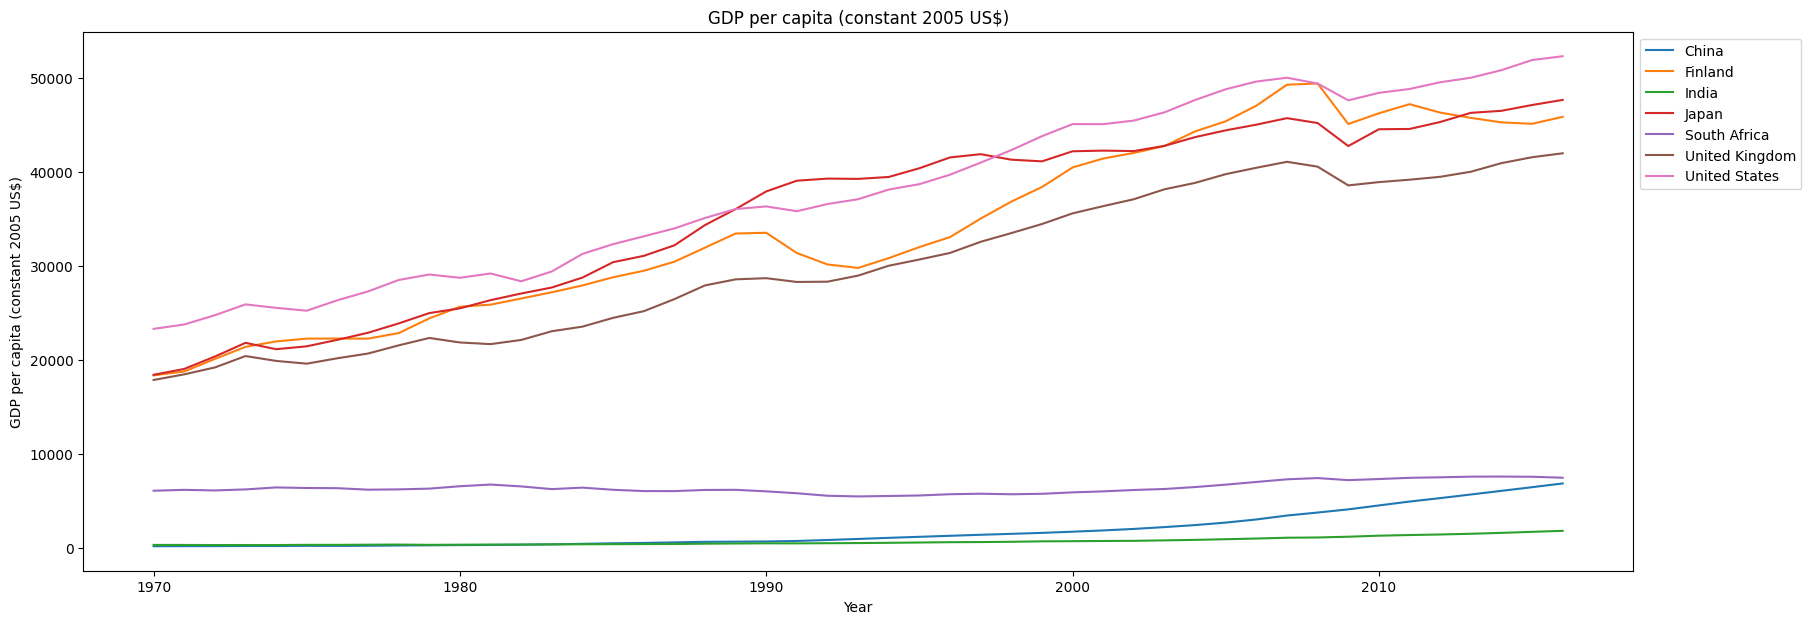

In [56]:
plt.figure(figsize=(12, 6))
print(title_6)
Data_Frame_6.plot(x='Year', y=['China', 'Finland', 'India', 'Japan', 'South Africa', 'United Kingdom', 'United States'], kind='line')
plt.title(title_6)
plt.xlabel('Year')
plt.ylabel('GDP per capita (constant 2005 US$)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The presented visualization illustrates the GDP per capita across various nations. Notably, developed countries such as the United States, Japan, Finland, and the United Kingdom exhibit elevated GDP per capita figures, whereas developing nations demonstrate considerably lower values. Despite India and China boasting substantial overall GDP figures, their GDP per capita remains comparatively low, primarily attributable to their large populations.

China has witnessed a noteworthy increase in GDP per capita, attributed to strategic measures. These include population control initiatives, progressive increments in daily wages through prudent economic policies, and a strategic facilitation of foreign investments at competitive rates. The latter strategy, coupled with a gradual enhancement of wages over time, has contributed significantly to China's observed rise in GDP per capita.

###**Relationship Between GDP per Capita & Literacy Rate**

In [57]:
Data_Frame_7=pd.merge(Data_Frame_5, Data_Frame_6, on='Year',how='inner')

# Display the merged DataFrame
Data_Frame_7

,Year,China_x,India_x,South Africa_x,China_y,Finland,India_y,Japan,South Africa_y,United Kingdom,United States
0,1980,65.505089,40.763592,76.200493,347.887413,25660.587887,389.926284,25489.166212,6598.604412,21865.128077,28734.399260
1,1981,65.505089,40.763592,76.200493,361.224711,25882.207210,403.878043,26358.347887,6777.129234,21688.996341,29191.999488
2,1982,65.505089,40.763592,76.200493,387.745581,26532.209184,408.324880,27064.101587,6578.606988,22132.998247,28362.494616
3,1990,77.785057,40.763592,76.200493,730.772489,33514.923031,536.162786,37906.163702,6057.935066,28691.292875,36312.414183
4,1991,77.785057,48.222069,76.200493,787.867435,31360.954387,530.894738,39044.927269,5853.255032,28291.921960,35803.868421
5,1996,77.785057,48.222069,82.402100,1335.362680,33059.096694,656.697144,41514.862495,5749.579545,31373.341190,39681.519858
6,2000,90.920210,48.222069,82.402100,1771.741506,40450.373375,762.313341,42169.697876,5945.998811,35576.766847,45055.817918
7,2001,90.920210,61.014560,82.402100,1905.610780,41399.943581,785.344628,42239.113089,6052.559317,36341.709750,45047.487198
8,2006,90.920210,62.754470,82.402100,3069.304781,47011.657598,1044.893940,44995.521508,7053.944700,40418.747305,49575.401014
9,2007,90.920210,62.754470,88.717250,3487.845766,49239.193957,1130.090071,45687.345751,7333.239858,41050.405926,49979.533843


In [58]:
#Droping the column with no data and those can not be related
Data_Frame_7.dropna( how = "all", inplace = True, axis = 1)
columns_no_data=["Japan","United Kingdom","United States","Finland"]
Data_Frame_7= Data_Frame_7.drop(columns_no_data, axis=1)
Data_Frame_7.fillna(method = "ffill", inplace = True)

# now using "bfill" on data.
Data_Frame_7.fillna(method = "bfill", inplace = True)

# Displaying cleaned matrix.
Data_Frame_7


,Year,China_x,India_x,South Africa_x,China_y,India_y,South Africa_y
0,1980,65.505089,40.763592,76.200493,347.887413,389.926284,6598.604412
1,1981,65.505089,40.763592,76.200493,361.224711,403.878043,6777.129234
2,1982,65.505089,40.763592,76.200493,387.745581,408.324880,6578.606988
3,1990,77.785057,40.763592,76.200493,730.772489,536.162786,6057.935066
4,1991,77.785057,48.222069,76.200493,787.867435,530.894738,5853.255032
5,1996,77.785057,48.222069,82.402100,1335.362680,656.697144,5749.579545
6,2000,90.920210,48.222069,82.402100,1771.741506,762.313341,5945.998811
7,2001,90.920210,61.014560,82.402100,1905.610780,785.344628,6052.559317
8,2006,90.920210,62.754470,82.402100,3069.304781,1044.893940,7053.944700
9,2007,90.920210,62.754470,88.717250,3487.845766,1130.090071,7333.239858


#### Chart - 13

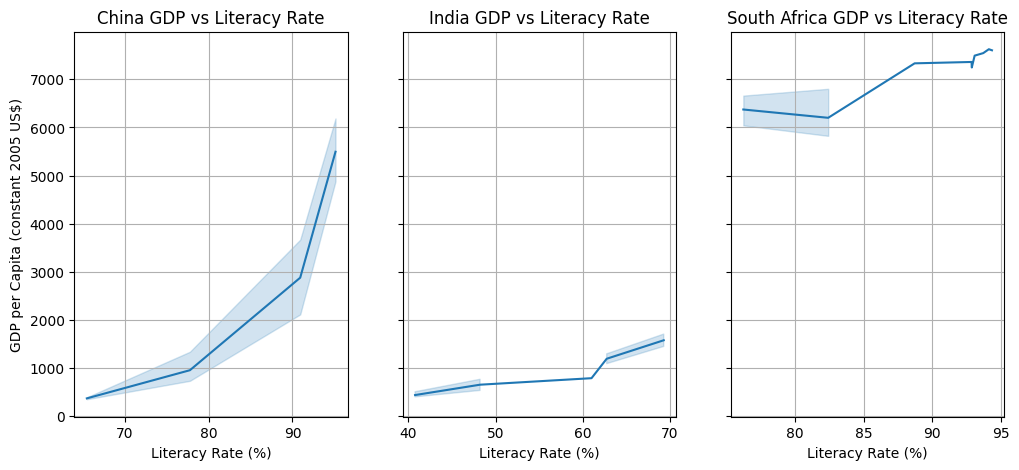

In [59]:
# Plots to show the relation between the GDP per capita and Adult Literacy Rate
countries_included = ['China', 'India', 'South Africa']

# Create subplots for each country
fig, axes = plt.subplots(1, len(countries_included), figsize=(12,5), sharey=True)

# Iterate over countries and plot data
for i, country in enumerate(countries_included):
    sns.lineplot(x=f'{country}_x', y=f'{country}_y',data=Data_Frame_7, ax=axes[i])
    axes[i].set_title(f'{country} GDP vs Literacy Rate')
    axes[i].set_xlabel('Literacy Rate (%)')
    axes[i].set_ylabel('GDP per Capita (constant 2005 US$)')
    axes[i].grid(True)

# Show the plots
plt.show()

Here we can see the relation between the Literacy Rate and the GDP per capita of the country.

We see a positive relation between the GDP per capita and the Literacy Rate. As the daily wages of the citizen increased, their comfort of giving their child education also increses.

With this representation we can conclude that India needs to work on increasing the GDP per capita of the country to increase the Literacy rate.

#### Chart - 14

###**PISA & PIRLS Mean Score**

The Programme for International Student Assessment (PISA) is a worldwide study by the Organisation for Economic Co-operation and Development in member and non-member nations intended to evaluate educational systems by measuring 15-year-old school pupils' scholastic performance on mathematics, science, and reading.

The Progress in International Reading Literacy Study (PIRLS) is an international assessment and research project designed to measure reading achievement at the fourth-grade level, as well as school and teacher practices related to instruction.

array([<Axes: ylabel='Pie Distribution of highest PISA score Continent wise'>],
      dtype=object)

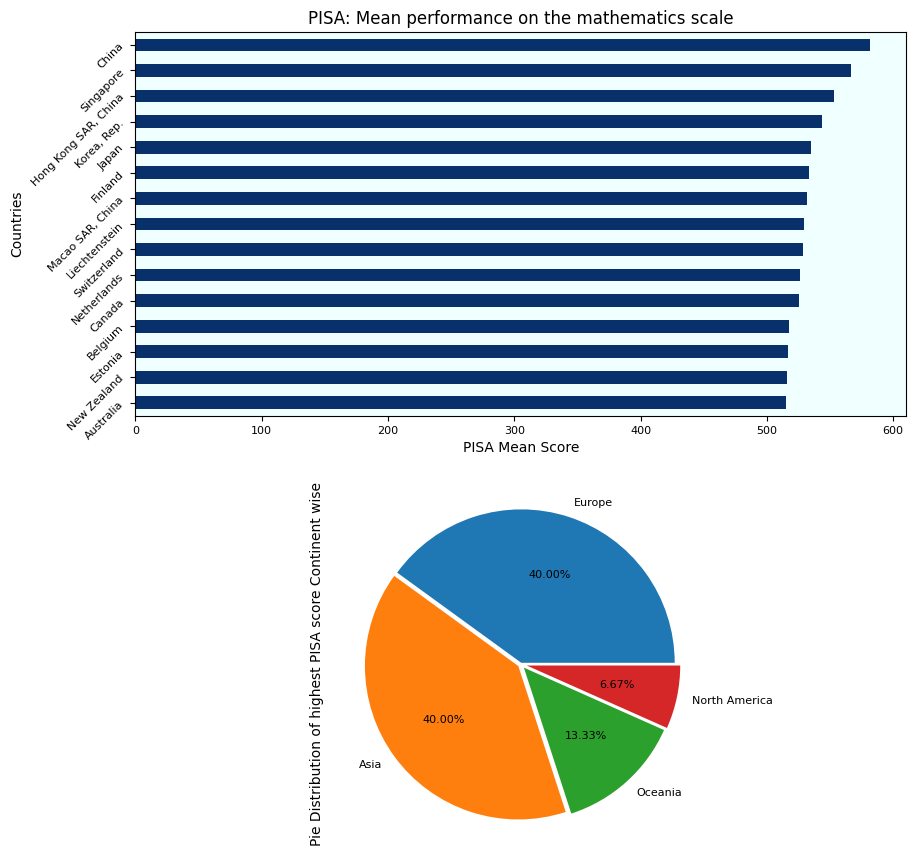

In [60]:
Indicator2= ['LO.PISA.MAT','LO.PIRLS.REA'
              #PISA & PIRLS Mean
             ]

# Filter the dataframe for the specified indicator
pisa_df = Update_Stats_Data[Update_Stats_Data['Indicator Code'] == Indicator2[0]].copy()

# Save the indicator name to 'Title8'
title_8 = pisa_df["Indicator Name"].iloc[0]

# Extract the columns for data analysis
data_columns = pisa_df.loc[:, "2000":"2020"]

# Calculate row mean and create a new column 'PISA_REA_mean'
pisa_df['PISA_REA_mean'] = data_columns.mean(axis=1)

# Filter rows with not-null 'PISA_REA_mean'
pisa_df = pisa_df[pd.notnull(pisa_df['PISA_REA_mean'])]

# Extract relevant columns for the pie chart
pisa_pie = pisa_df[['Country Name', 'PISA_REA_mean']]

# Select top 15 values for 'PISA_REA_mean'
pisa_pie = pisa_pie.sort_values(by="PISA_REA_mean")[-15:]

# Set 'Country Name' as index for bar plot
pisa_bar = pisa_pie.set_index('Country Name')

# Sort values for bar plot
pisa_bar = pisa_bar.sort_values(by="PISA_REA_mean")[-15:]

# Create figure and axes objects for subplots
figure, axes = plt.subplots(2, 1)
figure.tight_layout()

# Plot bar graph
pisa_bar.plot(kind='barh', figsize=(8, 9), ylim=(480, 550), xlabel="PISA Mean Score", ylabel="Countries",
              title=title_8, rot=45, colormap="Blues_r", legend=False, fontsize=8, ax=axes[0]).patch.set_facecolor('#f0ffff')

# Populate 'Continent' column with continents for each country
continent_mapping = {
    'Macao SAR, China': 'Asia',
    'Belgium': 'Europe',
    'Liechtenstein': 'Europe',
    'Netherlands': 'Europe',
    'Estonia': 'Europe',
    'Japan': 'Asia',
    'Australia': 'Oceania',
    'Switzerland': 'Europe',
    'New Zealand': 'Oceania',
    'Canada': 'North America',
    'Hong Kong SAR, China': 'Asia',
    'Singapore': 'Asia',
    'Korea, Rep.': 'Asia',
    'Finland': 'Europe',
    'China': 'Asia'
}

# Add 'Continent' column based on the mapping
pisa_pie['Continent'] = pisa_pie['Country Name'].map(continent_mapping)

# Plot pie chart for continent distribution
pisa_pie['Continent'].value_counts().plot(kind='pie', ylabel="Pie Distribution of highest PISA score Continent wise",
                                          subplots=True, figsize=(8, 9), autopct='%1.2f%%', explode=[0.01, 0.02, 0.03, 0.04],
                                          textprops={'fontsize': 8}, legend=False, ax=axes[1])


The PISA Mean score is used to determine the capability of 15 years old student to solve mathematics problems of given level.
With this we can score students of a certain inistitution or country.

From the representation above we first see the Top 15 countries with high PISA Mean score. In the Pie distribution we see the highest PISA Mean score continent wise. Europe and Asia has highest and equal no of PISA Scores in those Top 15 countries.
In Aisan continent Korea, China and Japan have the most PISA Mean score.
The other continents are North America and Oceania.

#### Chart - 15

array([<Axes: ylabel='Pie Distribution of highest PIRLS score Continent wise'>],
      dtype=object)

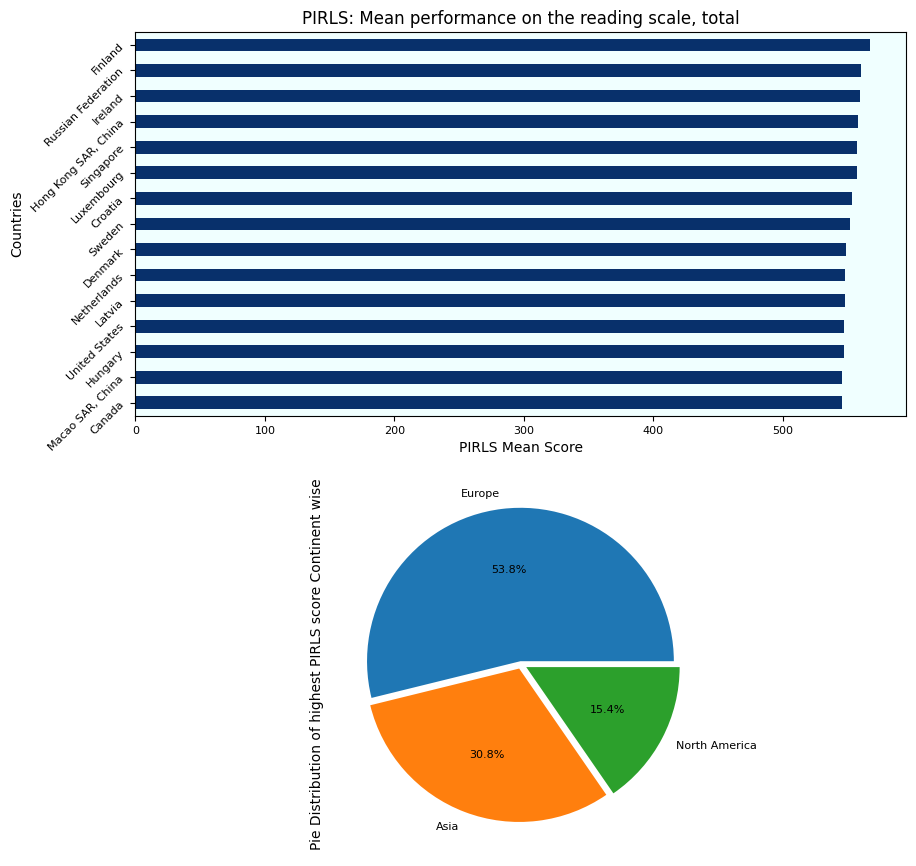

In [61]:
# Filter the dataframe for the specified indicator
pirls_df = Update_Stats_Data[Update_Stats_Data['Indicator Code'] == Indicator2[1]].copy()

# Save the indicator name to 'title_9'
title_9 = pirls_df["Indicator Name"].iloc[0]

# Extract the columns for data analysis
data_columns = pirls_df.loc[:, "2000":"2020"]

# Calculate row mean and create a new column 'PIRLS_mean'
pirls_df['PIRLS_mean'] = data_columns.mean(axis=1)

# Filter rows with not-null 'PIRLS_mean'
pirls_df = pirls_df[pd.notnull(pirls_df['PIRLS_mean'])]

# Extract relevant columns for the pie chart
pirls_pie = pirls_df[['Country Name', 'PIRLS_mean']]

# Select top 15 values for 'PIRLS_mean'
pirls_pie = pirls_pie.sort_values(by="PIRLS_mean")[-15:]

# Set 'Country Name' as index for bar plot
pirls_bar = pirls_pie.set_index('Country Name')

# Sort values for bar plot
pirls_bar = pirls_bar.sort_values(by="PIRLS_mean")[-15:]

# Create figure and axes objects for subplots
figure, axes = plt.subplots(2, 1)
figure.tight_layout()

# Plot bar graph
pirls_bar.plot(kind='barh', figsize=(8, 9), ylim=(480, 550), xlabel="PIRLS Mean Score", ylabel="Countries",
              title=title_9, rot=45, colormap="Blues_r", legend=False, fontsize=8, ax=axes[0]).patch.set_facecolor('#f0ffff')

# Populate 'Continent' column with continents for each country
continent_mapping_2 = {
    'Sweden': 'Europe',
    'Russian Federation': 'Asia',
    'Luxemborg': 'Europe',
    'Netherlands': 'Europe',
    'Crotia': 'Europe',
    'Latvia': 'Europe',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'United States': 'North America',
    'Canada': 'North America',
    'Hong Kong SAR, China': 'Asia',
    'Singapore': 'Asia',
    'Hungary': 'Europe',
    'Finland': 'Europe',
    'Macao SAR, China': 'Asia'
}

# Add 'Continent' column based on the mapping
pirls_pie['Continent'] = pirls_pie['Country Name'].map(continent_mapping_2)

# Plot pie chart for continent distribution
pirls_pie['Continent'].value_counts().plot(kind='pie', ylabel="Pie Distribution of highest PIRLS score Continent wise",
                                          subplots=True, figsize=(8, 9), autopct='%2.1f%%', explode=[0.02, 0.03, 0.04],
                                          textprops={'fontsize': 8}, legend=False, ax=axes[1])


The visuals represent the PIRLS Mean scores of the top 15 countries with highest scores, assessing 4th-grade students' proficiency in understanding intermediate-level sentences in their respective languages. The horizontal bar chart highlights the countries with the highest mean scores, while the pie chart categorizes the cumulative mean scores by continent.

Notably, Europe exhibits the highest sum of mean scores, indicative of its robust education quality. In the Asian continent, significant contributions come from Russia and China, underlining regional variations in educational performance.

## ***Solution to Business Objective***

Thorough analysis of the current state of the education sector in India and identified key areas for improvement to align with our business objectives. Here are some strategic recommendations presented in a point-wise manner:

1. Population Control for Improved Pupil to Student Ratio:

  *   Implement policies to restrict the birth rate in the country.
  *   Targeted family planning initiatives can help in achieving a lower Pupil to Student ratio in the coming years.
  *   This reduction in student population will contribute to an enhanced quality of education by allowing for more personalized attention and resources per student.

2. Increase GDP Per Capita for Enhanced Parental Support:
  *  Focus on initiatives to boost the country's GDP per capita.

  *   Economic growth will result in higher income for parents, enabling them to provide better educational opportunities for their children.
  *   A financially stable household is more likely to invest in quality education, contributing to overall improvements in the education sector.

3. Higher Allocation of GDP to Education Sector:

  *   Advocate for and implement policies that allocate a higher percentage of the country's GDP to the education sector.
  *   Increased investment will lead to improved infrastructure, better-qualified teachers, and enhanced educational resources.
  
  *   This strategic move will directly contribute to elevating the overall quality of education in India.

By implementing these recommendations, we can work towards achieving our business objectives in the education sector. These strategic actions address the need for a balanced approach, focusing on both population control and economic development, while ensuring a significant and targeted investment in education.

# **Conclusion**

In this exploratory data analysis, we examined multiple datasets to assess the current states and trends across various aspects in different countries.
In the first part it was illustrated how money is invested on countries based on income groups. We can conclude that most money is invested in countries in Upper Middle Income group, but the countries in Lower Income group has shown really great improvement despite facing many hardships.

In the second part, the data was illustrated based on countries, where 7 different countries were chosen: 3 developing countries; 4 developed countries which included Finland keeping it as base reference as it has the best education system in the world. From the visualizations we saw the current standing of The India.
India has demonstrated significant progress in the education sector, often rivaling developed nations. Despite overcoming numerous challenges, there are key areas that require attention to position India competitively on the global stage:

1. India has successfully increased early enrollment in schools, ensuring that children commence their education at a young age.

2. Developed countries allocate a substantial portion of their GDP to education. In contrast, India's investment in this sector remains comparatively lower. A similar scenario is observed in South Africa, where limited GDP constrains the development of schools and colleges to international standards.

3. The high Pupil-to-Student ratio in India, ranging from 35-40 across education levels, contributes to lower educational quality. Developed nations maintain a significantly lower ratio, exemplified by Finland's education system which is best in the world, with 8-15 students per teacher.

4. The positive correlation between Literacy Rate and GDP per capita is evident, emphasizing the importance of economic well-being in education quality. While India has made strides in literacy, a comparatively low GDP per capita hinders further progress. Countries like China and South Africa, with higher GDP per capita, exhibit elevated literacy rates.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***